In [76]:
import numpy as np
import math
import matplotlib.pyplot as plt
from random import randint

### Vlad's Simulation Data - Single Contact Single Muscle

In [77]:
singlemuscle_singlecontact = np.genfromtxt('/Volumes/L_MillerLab/limblab/User_folders/Aajan/PNS_Modeling_Toolbox-main/COMSOL_Modeling/mmActivationMatrix.csv', delimiter=',')

In [78]:
singlemuscle_singlecontact.shape

(450, 7)

In [79]:
newshape = (30,15,7)
all_ys = np.reshape(singlemuscle_singlecontact, newshape, order = 'F')

In [80]:
all_ys.shape

(30, 15, 7)

In [81]:
test = singlemuscle_singlecontact[:30,:]

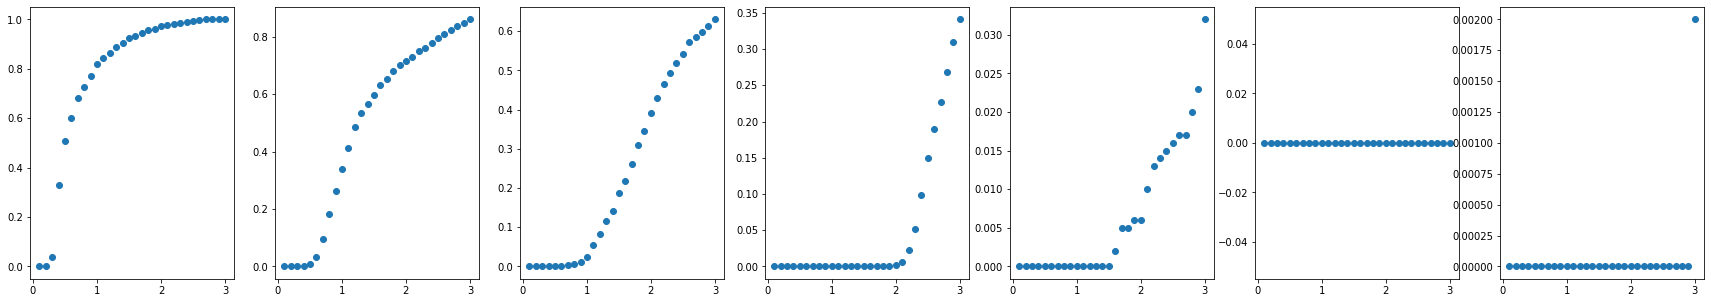

In [82]:
fig, ax = plt.subplots(nrows = 1, ncols = 7)
fig.set_size_inches(30,5)
for i in range(7):
    ax[i].scatter(np.arange(0.1,3.1,0.1),test[:,i])
#     plt.show()

### Plot 

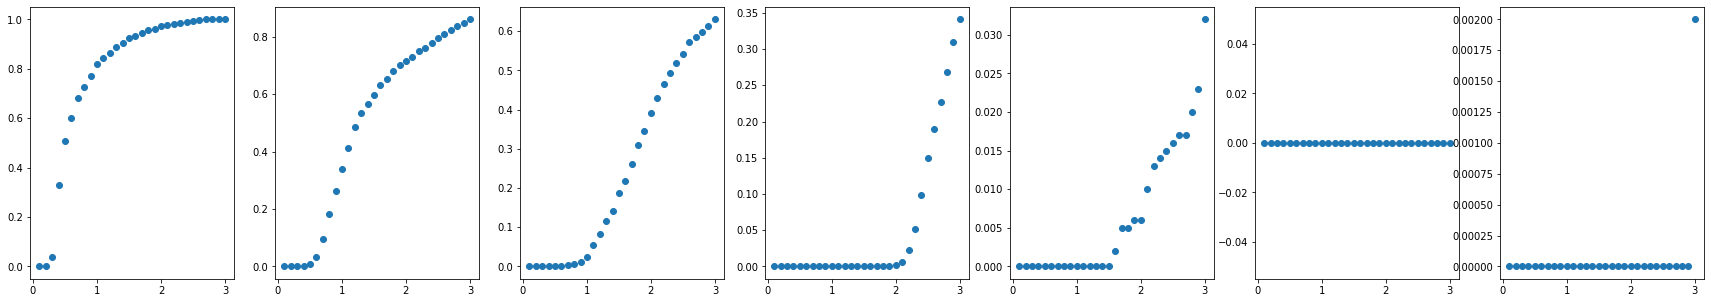

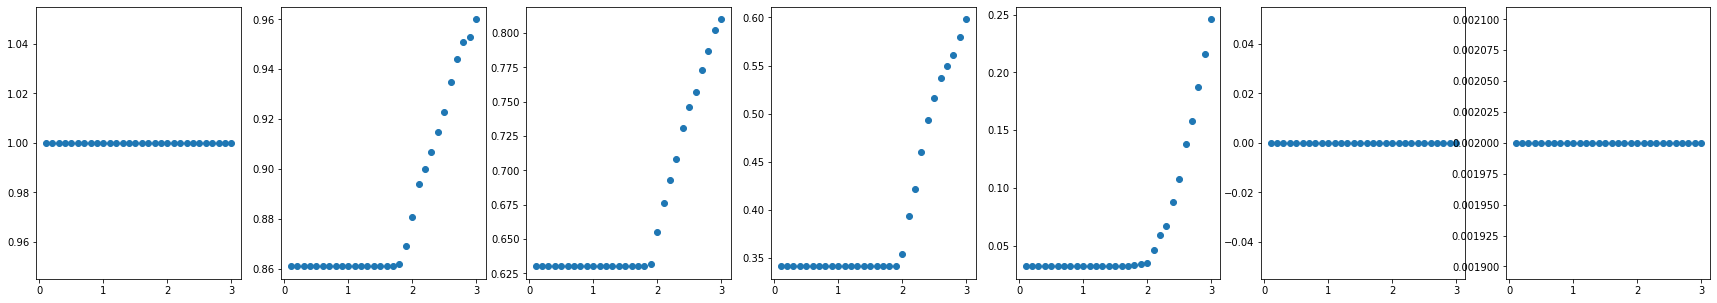

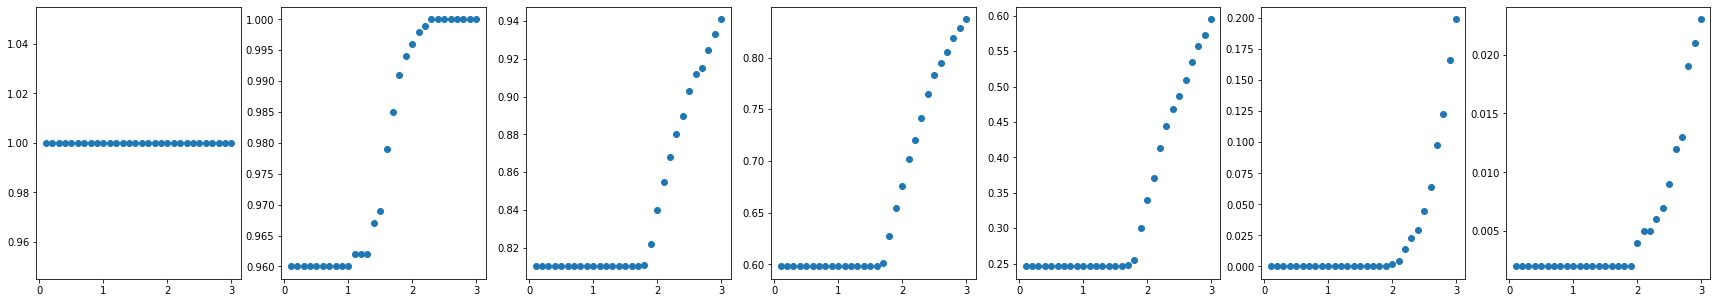

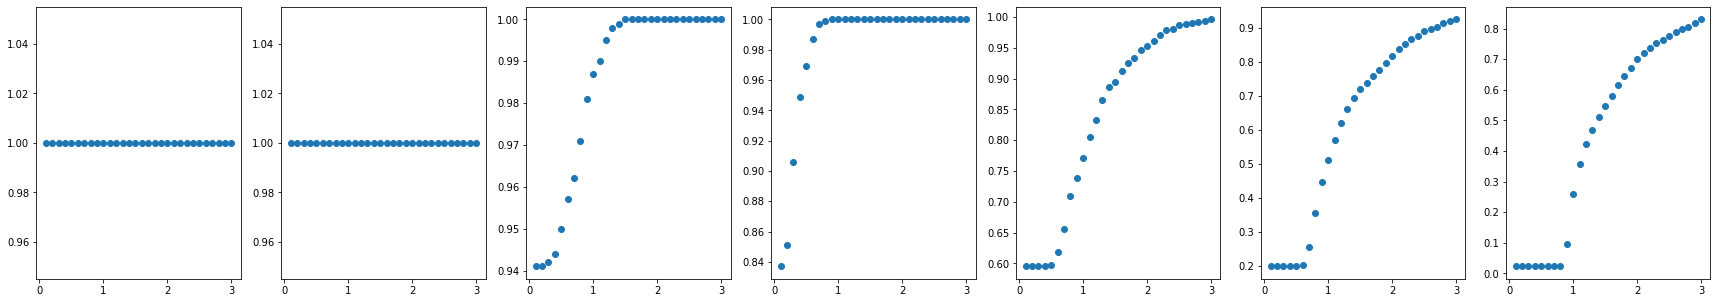

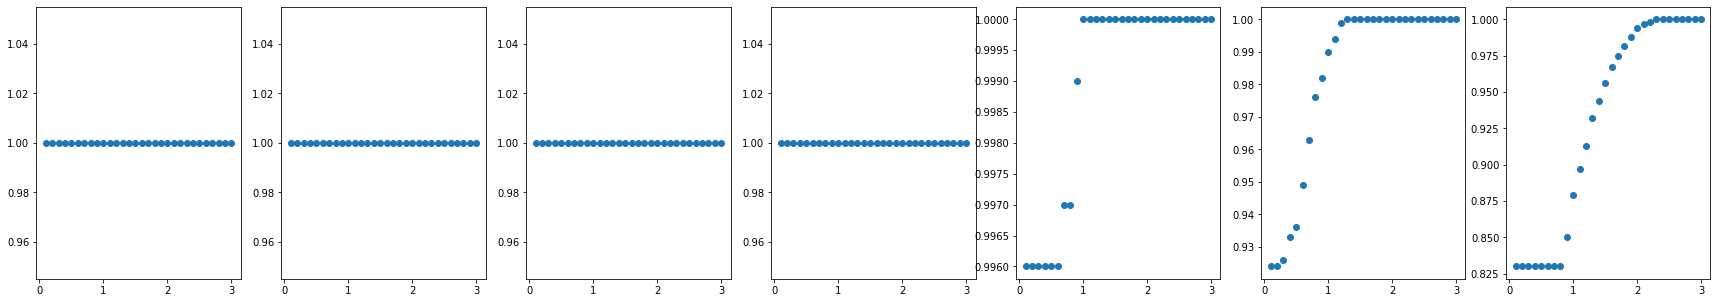

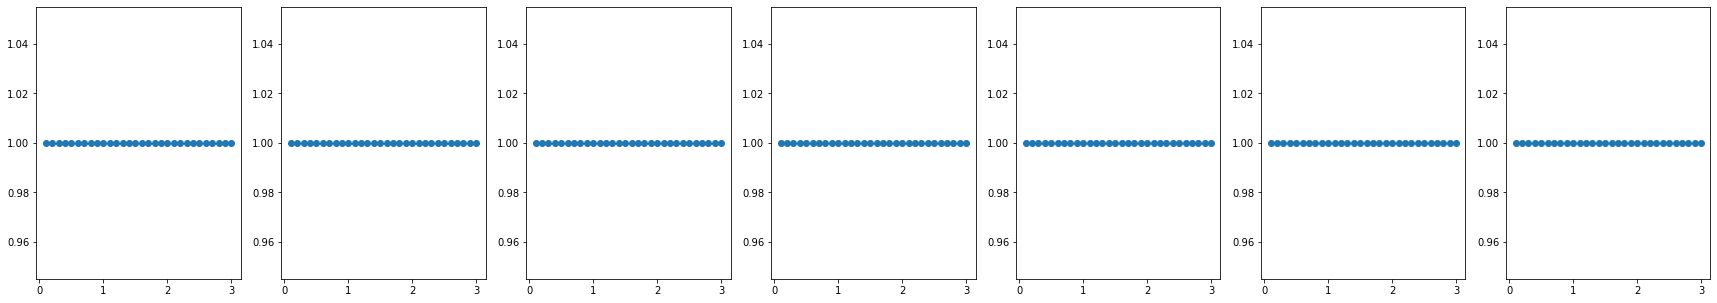

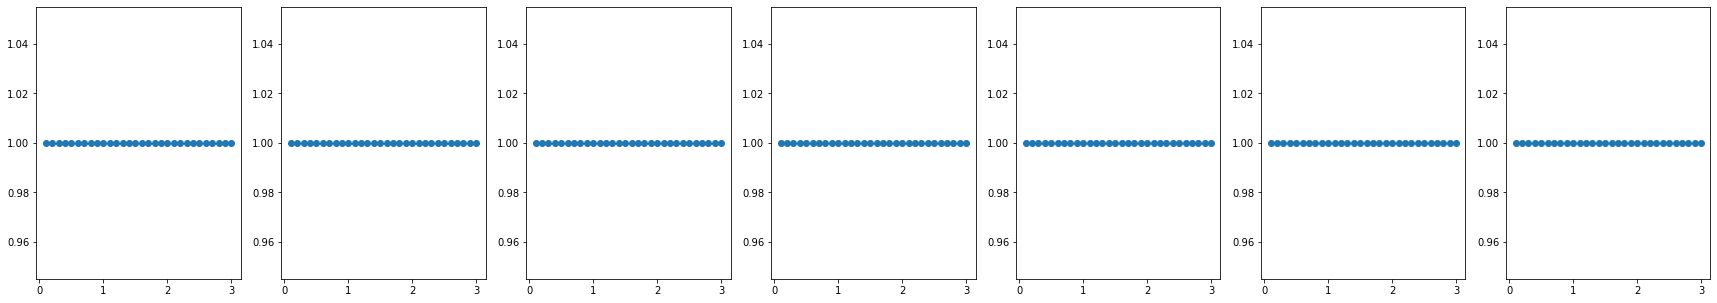

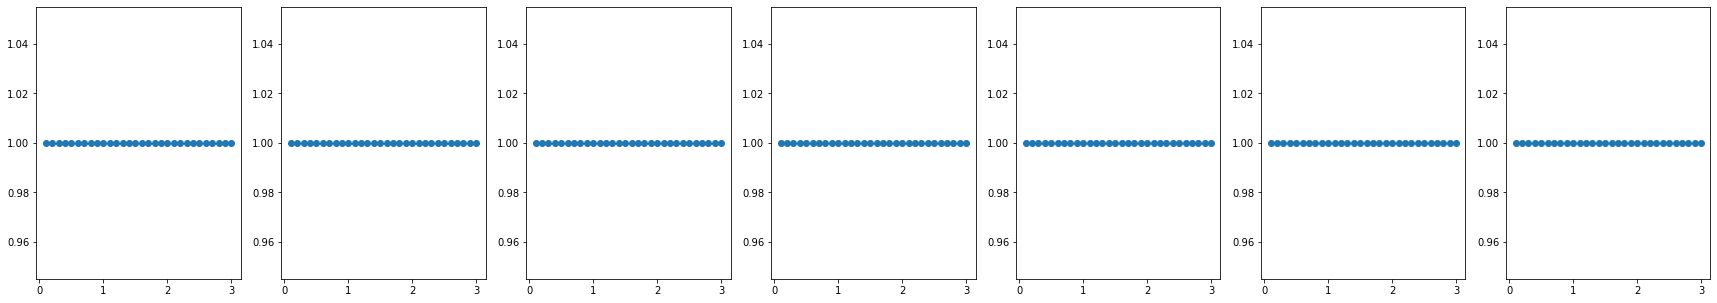

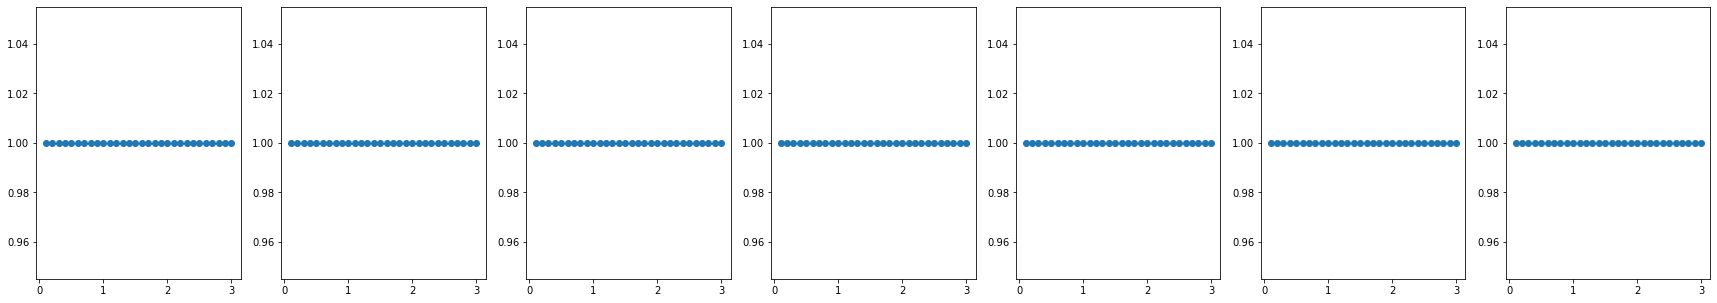

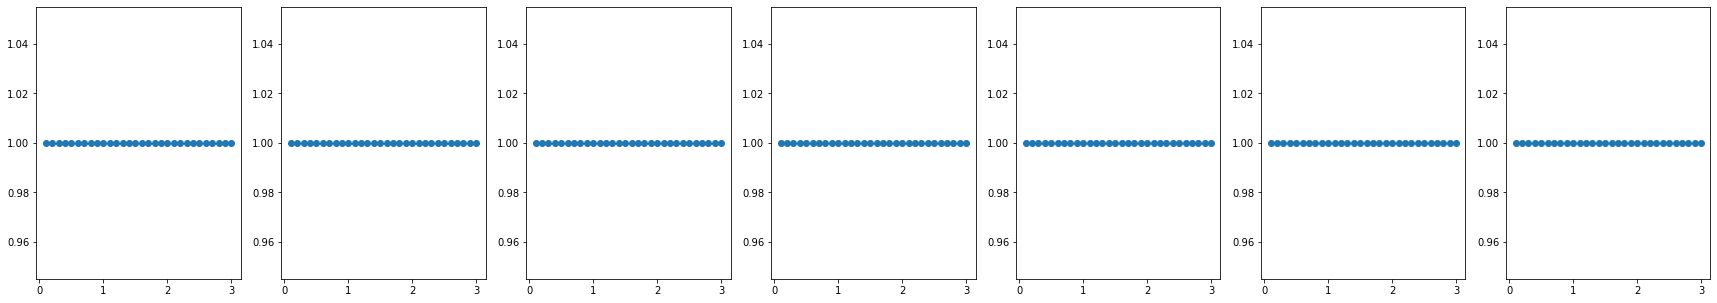

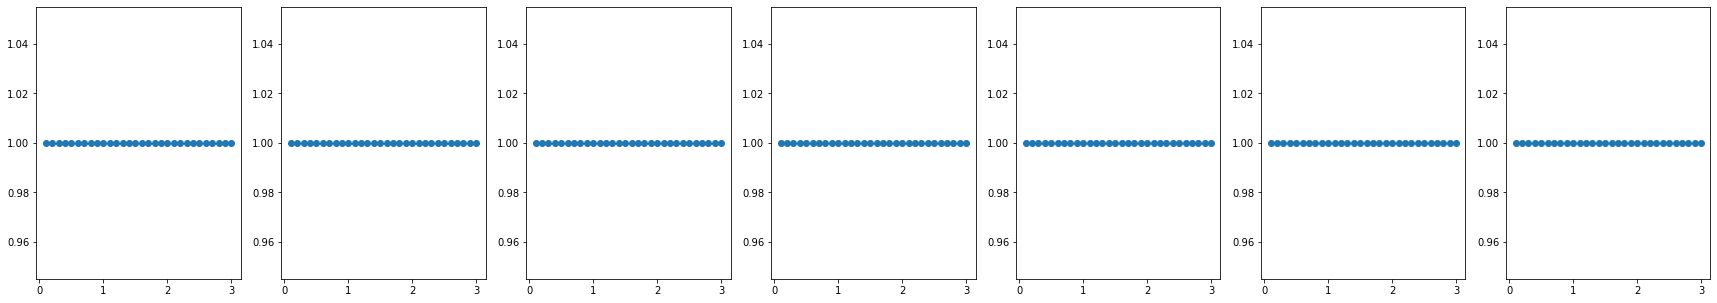

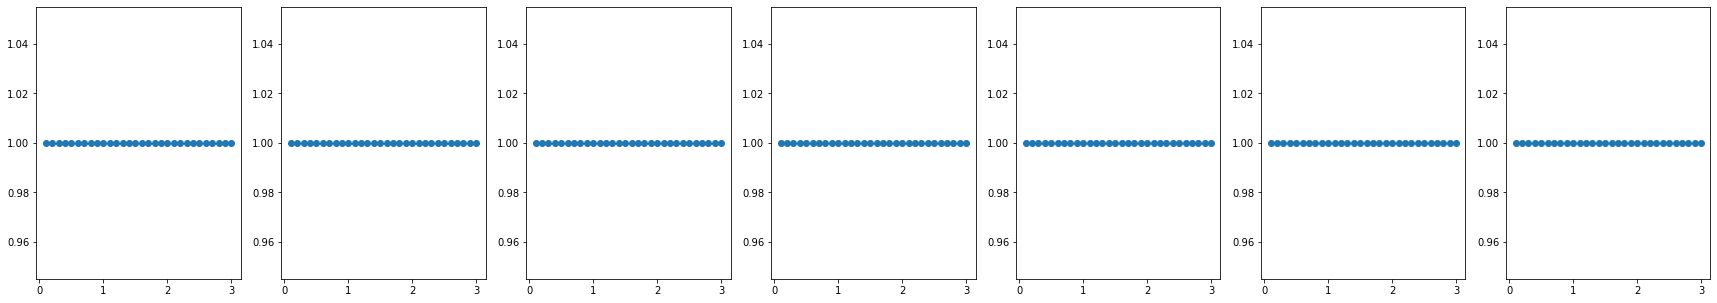

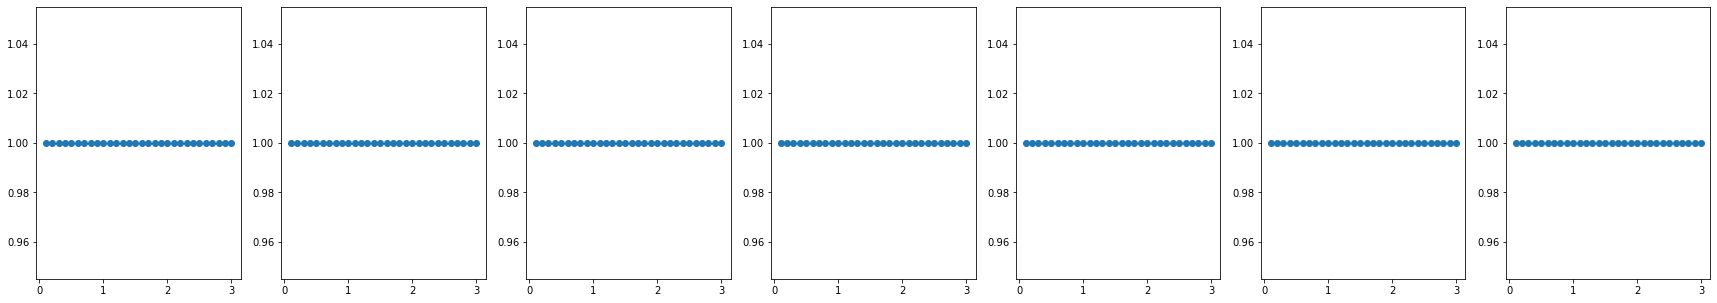

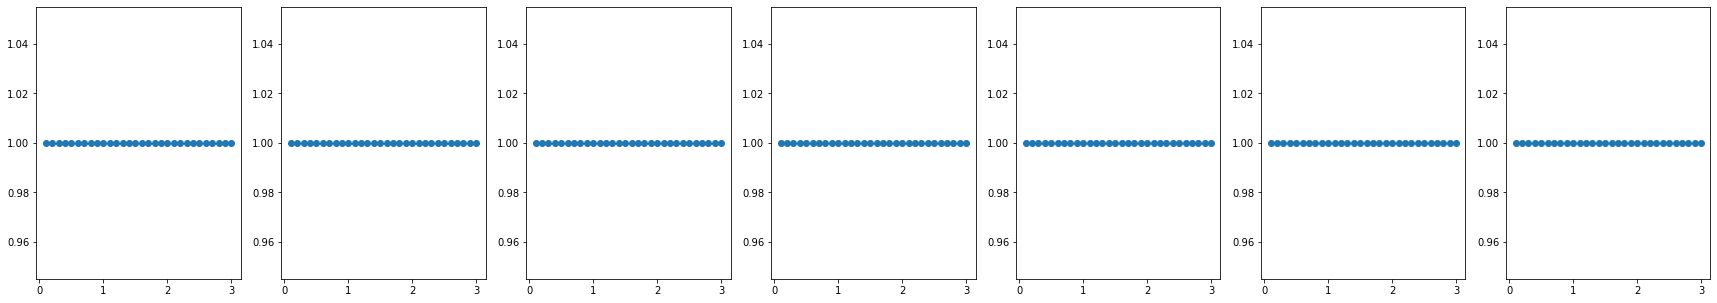

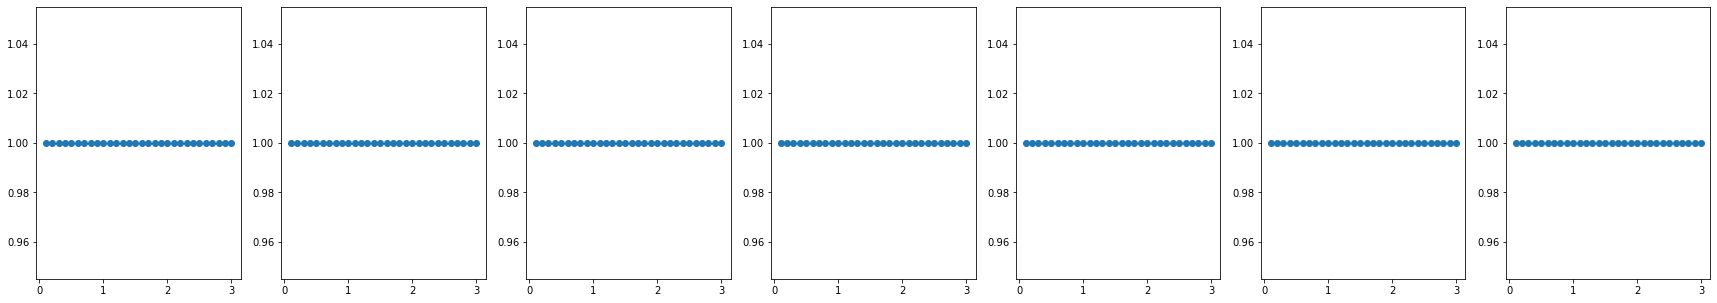

In [83]:
for j in range(15): 
    fig, ax = plt.subplots(nrows = 1, ncols = 7)
    fig.set_size_inches(30,5)
    for i in range(7):
        ax[i].scatter(np.arange(0.1,3.1,0.1),all_ys[:,j,i])
    plt.show()

# Single sigmoid model and optimize using gradient descent

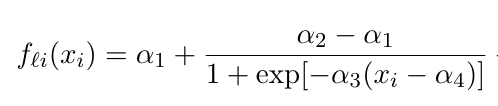

In [68]:
def single_sig_model(xi, theta):
    a1, a2, a3, a4 = theta[0], theta[1], theta[2], theta[3]
    return a1 + (a2-a1)/(1+math.exp(-a3*(xi-a4)))

def compute_square_loss_single_sig(xi, yi, theta):
    loss = (single_sig_model(xi, theta)-yi)**2
    return(loss)

def compute_square_loss_gradient_single_sig(xi, yi, theta):
    a1, a2, a3, a4 = theta[0], theta[1], theta[2], theta[3]
    
    df_da1 = 1-1/(1+math.exp(-a3*(xi-a4)))
    df_da2 = 1/(1+math.exp(-a3*(xi-a4)))
    df_da3 = (-1*(a2-a1)/((1+math.exp(-a3*(xi-a4)))**2)) * math.exp(-a3*(xi-a4))*(a4-xi)
    df_da4 = (-1*(a2-a1)/((1+math.exp(-a3*(xi-a4)))**2)) * math.exp(-a3*(xi-a4))*a3
    
    grad_J = np.array([2*df_da1*(single_sig_model(xi, theta)-yi), 2*df_da2*(single_sig_model(xi, theta)-yi),\
                       2*df_da3*(single_sig_model(xi, theta)-yi), 2*df_da4*(single_sig_model(xi, theta)-yi)])
    return(grad_J)

In [64]:
def stochastic_grad_descent_single_sig(X, y, theta = np.array([0.0,1.0,1.0,1.5]), num_epoch=10000):
    num_instances, num_features = 30, 4
    loss_hist = np.zeros(num_epoch) #Initialize loss_hist
    
    for n in range(num_epoch):
        loss = 0
        for i in range(len(X)):
            xi = X[i]
            yi = y[i]
            grad_f = compute_square_loss_gradient_single_sig(xi,yi,theta)
            #step size changes with 1/sqrt(t)
            theta -= 0.01*grad_f
            loss += compute_square_loss_single_sig(xi,yi,theta)
        loss_hist[n]=loss/num_instances
        
    return(theta,loss_hist)

### Plot Loss and Model Fit

In [6]:
X = np.arange(0.1,3.1,0.1)
ys = [all_ys[:,0,0], all_ys[:,0,1], all_ys[:,0,2], all_ys[:,2,1]]
thetas = []
preds_l = []

In [1]:
def fit_and_plot(X,y):
    for y in ys:    
        theta, loss_hist = stochastic_grad_descent(X, y)
        final_loss = round(loss_hist[-1],7)
        theta = np.round(theta,3)
        print('Final loss: {}'.format(final_loss))
        print('a1: {}, a2: {}, a3: {}, a4: {}'.format(theta[0],theta[1],theta[2],theta[3]))
        fig, ax = plt.subplots(nrows = 1, ncols = 2)
        fig.set_size_inches(8, 3)
        ax[0].plot(loss_hist)
        ax[0].set_xlabel('Epoch')
        ax[0].set_ylabel('Loss')

        preds = [model(xi, theta) for xi in X]
        ax[1].plot(X, preds)
        ax[1].scatter(X, y)
        ax[1].set_xlabel('Current (mA)')
        ax[1].set_ylabel('Activation')
        plt.show()

        thetas.append(theta)
        preds_l.append(preds)

Final loss: 7.97e-05
a1: -0.022, a2: 0.973, a3: 2.875, a4: 1.768


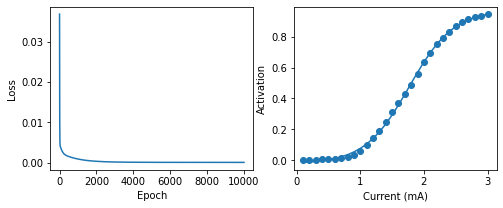

Final loss: 8.48e-05
a1: -0.003, a2: 0.998, a3: 4.663, a4: 1.426


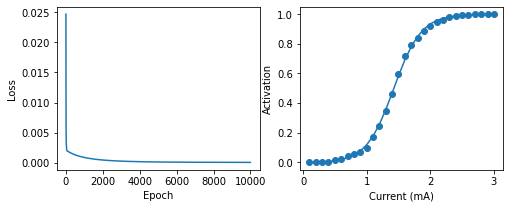

Final loss: 8.42e-05
a1: -0.003, a2: 0.962, a3: 4.657, a4: 1.828


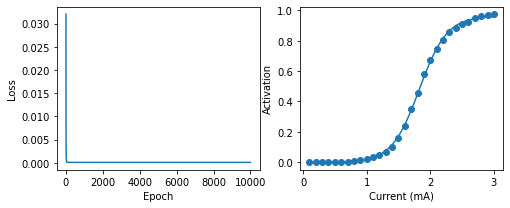

Final loss: 4.41e-05
a1: -0.006, a2: 0.986, a3: 4.209, a4: 1.531


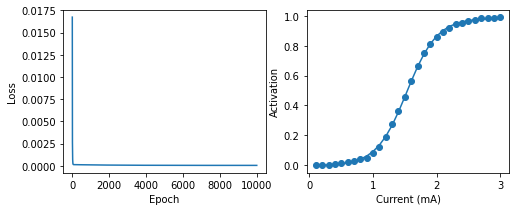

In [9]:
for j in range(15):
    fig, ax = plt.subplots(nrows = 1, ncols = 7)
    fig.set_size_inches(30,5)
    for i in range(7):
        y = all_ys[:,j,i]
        theta, loss_hist = stochastic_grad_descent(X, y)
        final_loss = round(loss_hist[-1],7)
        theta = np.round(theta,3)
        print('Final loss: {}'.format(final_loss))
        print('a1: {}, a2: {}, a3: {}, a4: {}'.format(theta[0],theta[1],theta[2],theta[3]))
        fig, ax = plt.subplots(nrows = 1, ncols = 2)
        fig.set_size_inches(8, 3)
        ax[0].plot(loss_hist)
        ax[0].set_xlabel('Epoch')
        ax[0].set_ylabel('Loss')

        preds = [model(xi, theta) for xi in X]
        ax[1].plot(X, preds)
        ax[1].scatter(X, y)
        ax[1].set_xlabel('Current (mA)')
        ax[1].set_ylabel('Activation')
        plt.show()

        thetas.append(theta)
        preds_l.append(preds)

### Two Contact Interaction: muscle 7, contacts 6 and 11

#### Original Curves

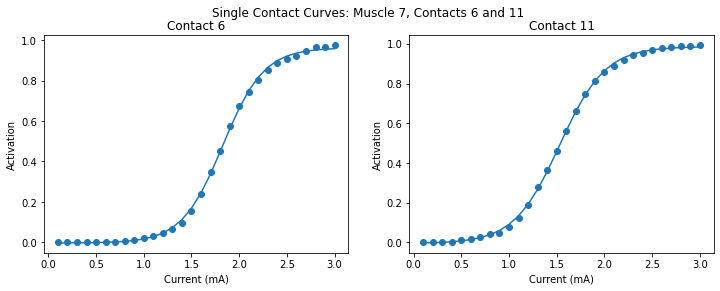

In [10]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(12, 4)
fig.suptitle('Single Contact Curves: Muscle 7, Contacts 6 and 11')
ax[0].scatter(X, all_ys[:,5,6])
ax[0].plot(X, preds_l[2])
ax[0].set_xlabel('Current (mA)')
ax[0].set_ylabel('Activation')
ax[0].set_title('Contact 6')
ax[1].scatter(X, all_ys[:,10,6])
ax[1].plot(X, preds_l[3])
ax[1].set_xlabel('Current (mA)')
ax[1].set_ylabel('Activation')
ax[1].set_title('Contact 11')
plt.show()

In [11]:
muscle7_contacts_6_11 = np.genfromtxt('/Volumes/L_MillerLab/limblab/User_folders/Aajan/PNS_Modeling_Toolbox-main/COMSOL_Modeling/AajanCode/mult_contact_ActivationMatrix.csv', delimiter=',')

In [12]:
muscle7_contacts_6_11.shape

(900,)

In [13]:
# rows vary in contact 6, columns vary in contact 11
all_ys_multcontact = np.reshape(muscle7_contacts_6_11, (30,30))

#### Plots for multicontact interactions

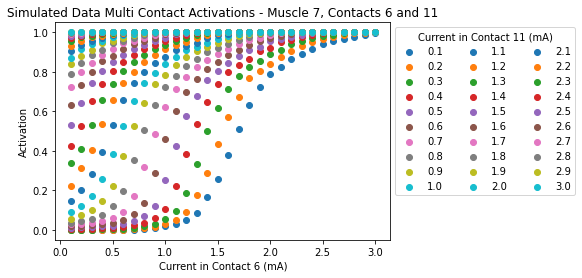

In [15]:
# As the current in contact 11 increases, the curve shifts to the left
for i in all_ys_multcontact:
    plt.scatter(X, i)
    plt.xlabel('Current in Contact 6 (mA)')
    plt.ylabel('Activation')
    plt.title('Simulated Data Multi Contact Activations - Muscle 7, Contacts 6 and 11')
    plt.legend(np.round(X,1), title = 'Current in Contact 11 (mA)', ncol = 3, bbox_to_anchor = (1,1))

In [16]:
cont6 = all_ys[:,5,6]
cont11 = all_ys[:,10,6]
overlap = np.zeros((30,30))

for i in range(len(cont11)):
    for j in range(len(cont6)):
        overlap[i][j] += cont6[j]+cont11[i]-cont6[j]*cont11[i]

In [17]:
cont6[-1], cont11[-1]

(0.975, 0.993)

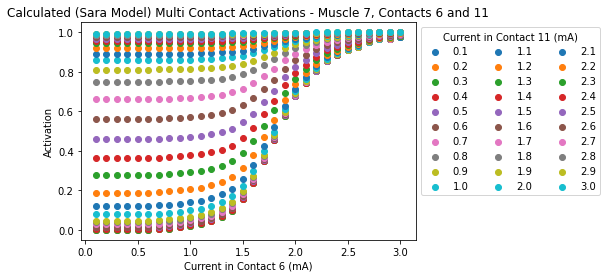

In [18]:
for i in overlap:
    plt.scatter(X, i)
    plt.xlabel('Current in Contact 6 (mA)')
    plt.ylabel('Activation')
    plt.title('Calculated (Sara Model) Multi Contact Activations - Muscle 7, Contacts 6 and 11')
    plt.legend(np.round(X,1), title = 'Current in Contact 11 (mA)', ncol = 3, bbox_to_anchor = (1,1))

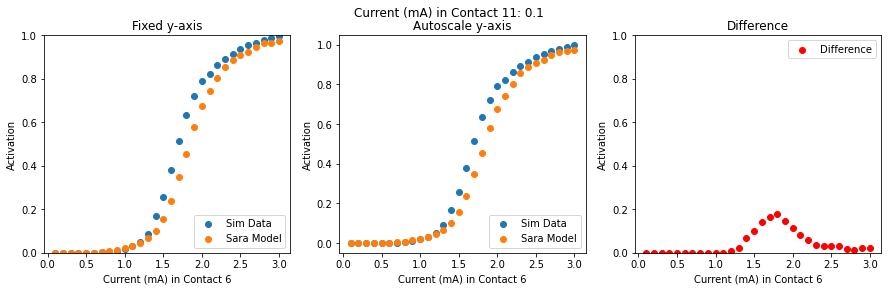

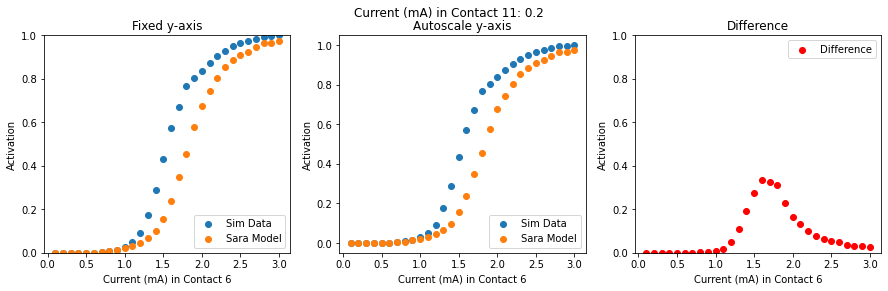

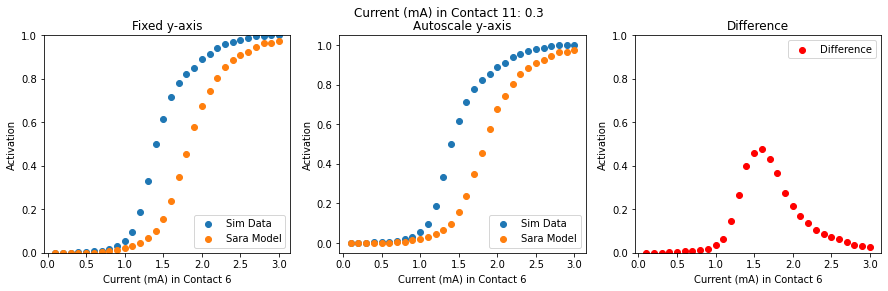

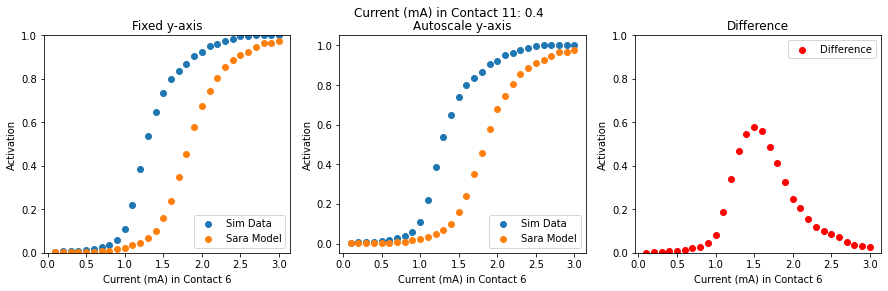

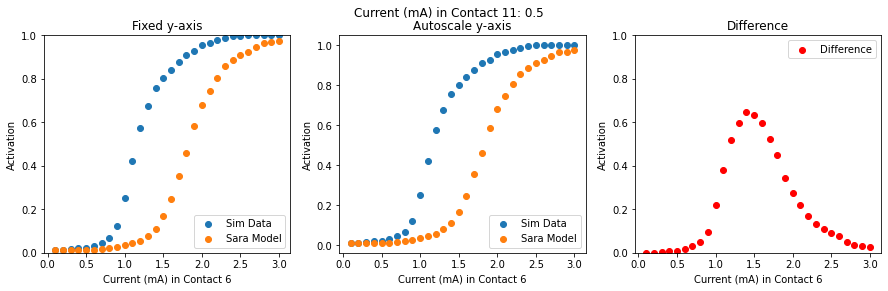

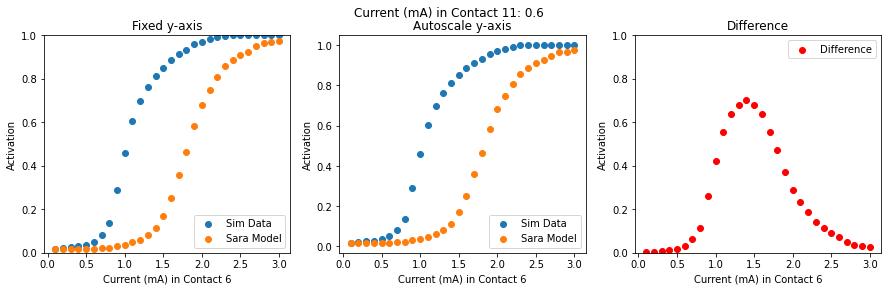

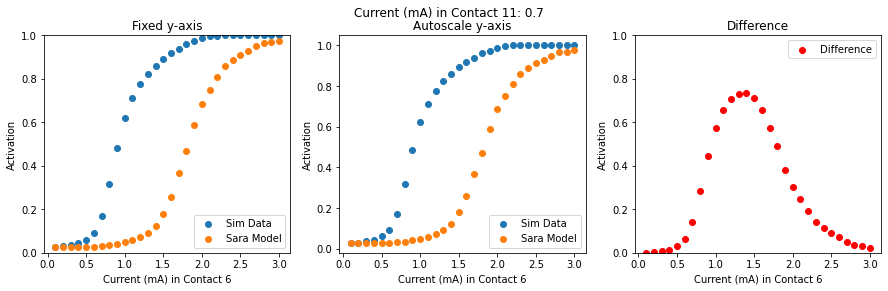

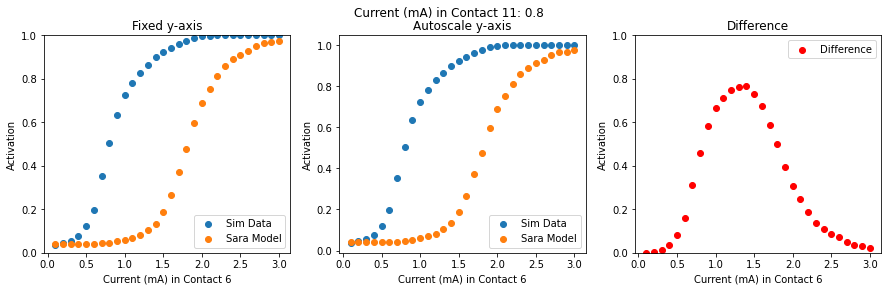

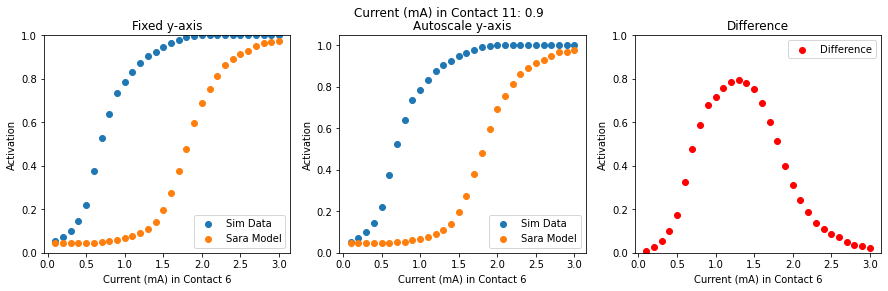

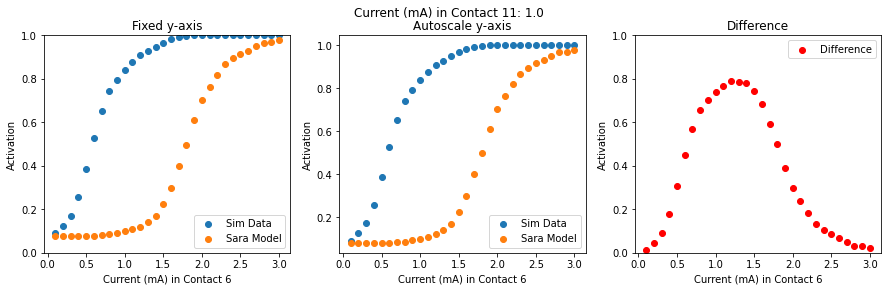

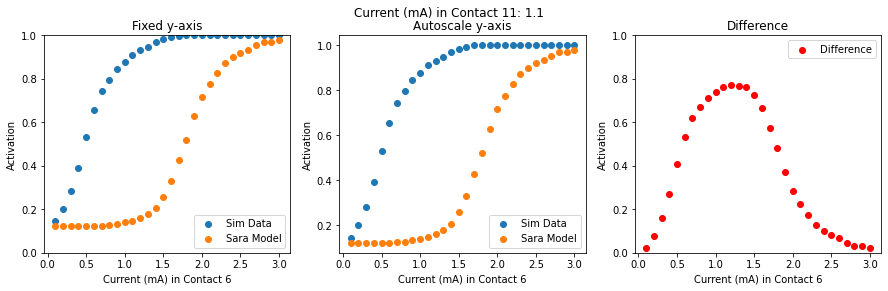

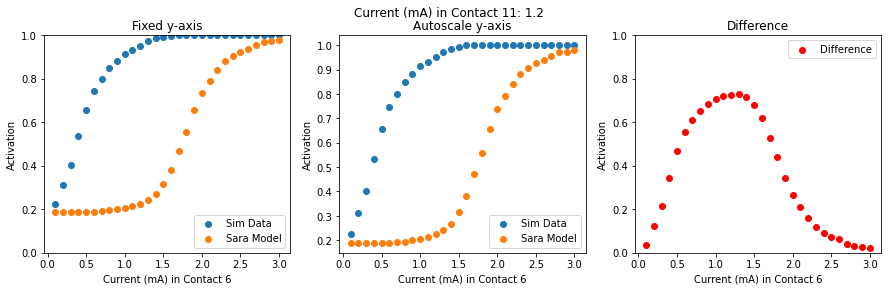

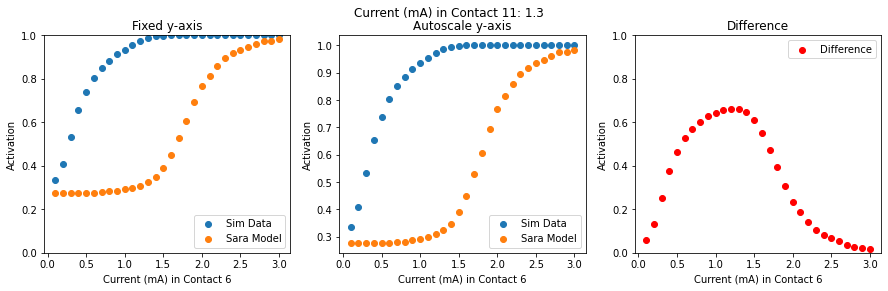

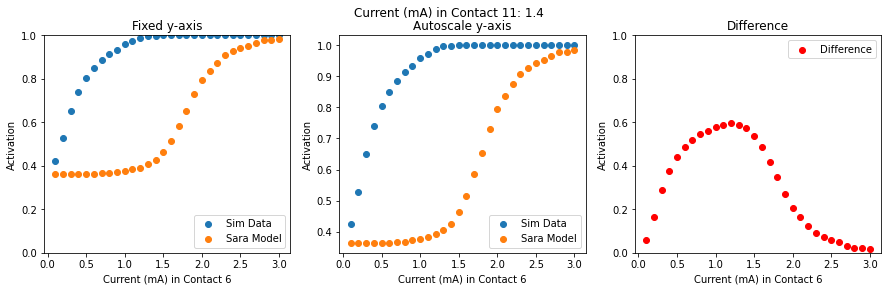

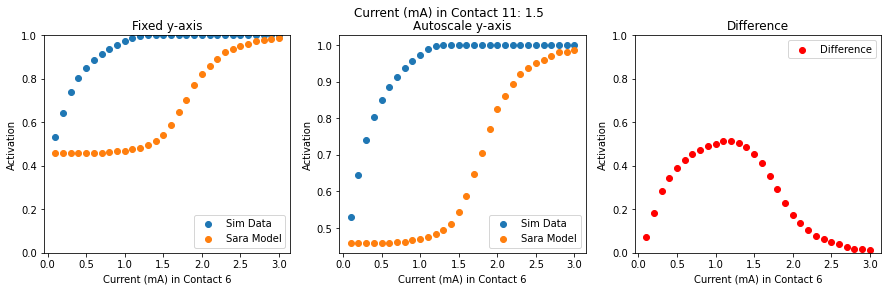

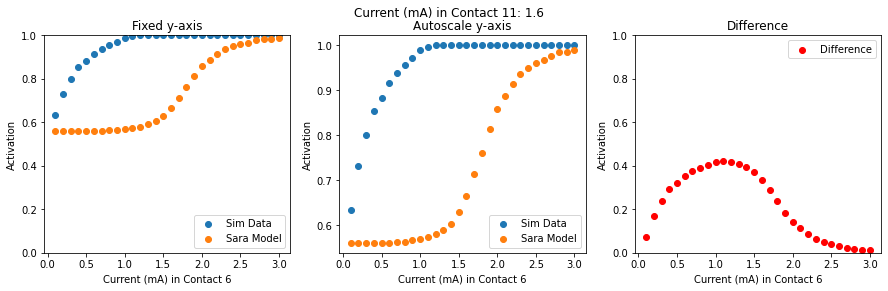

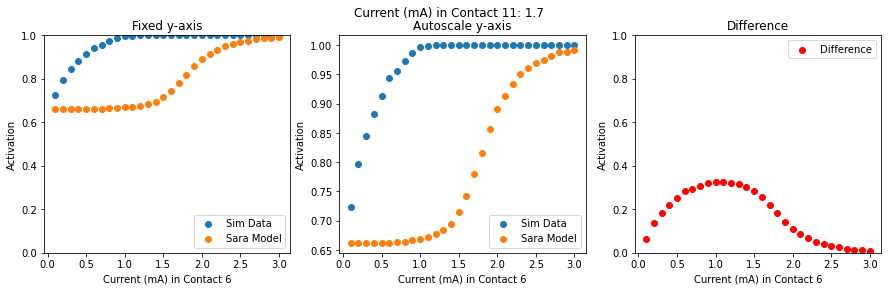

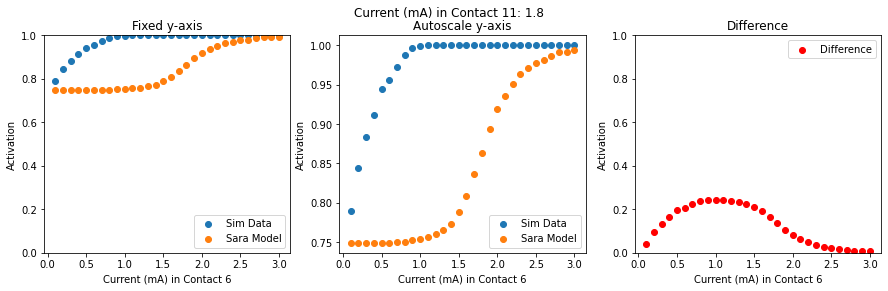

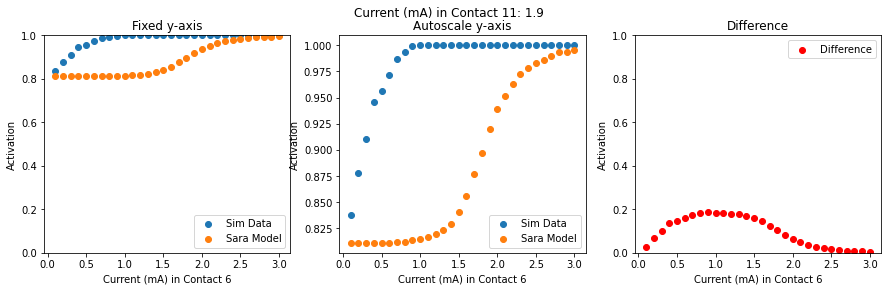

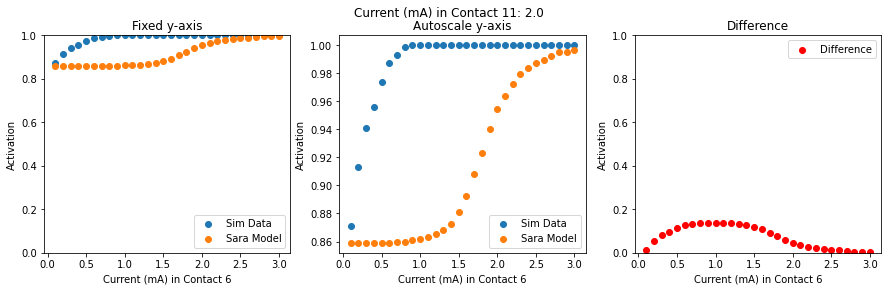

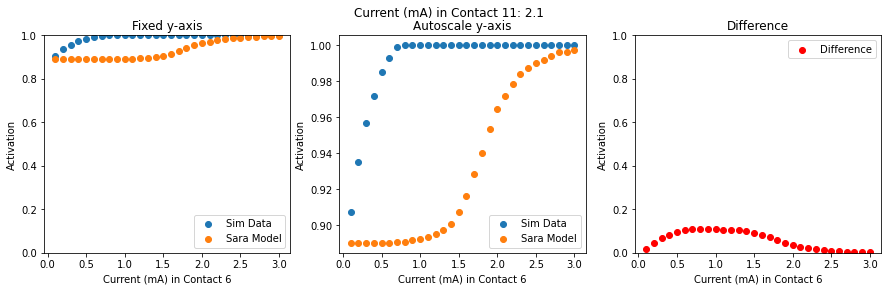

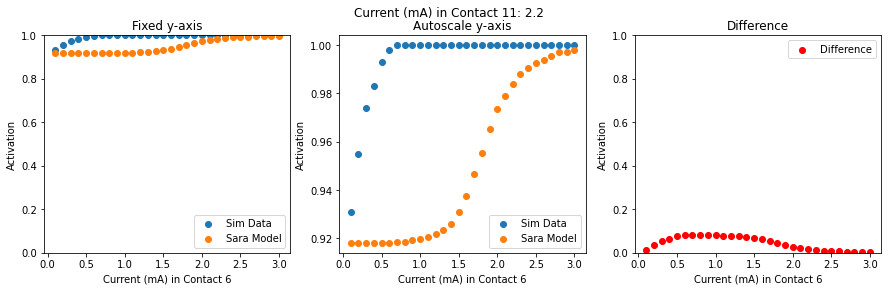

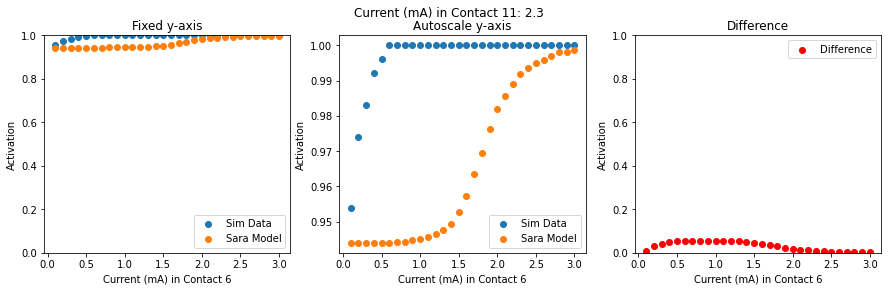

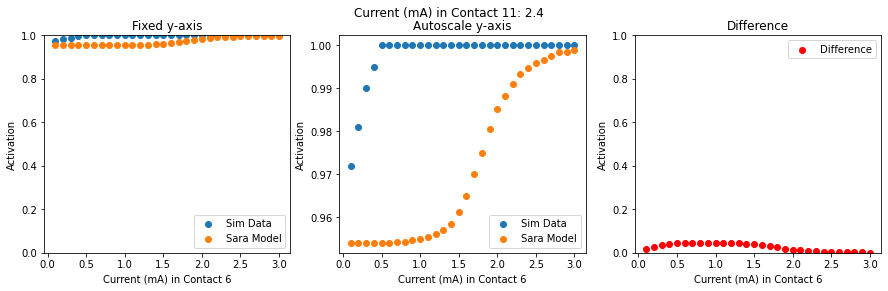

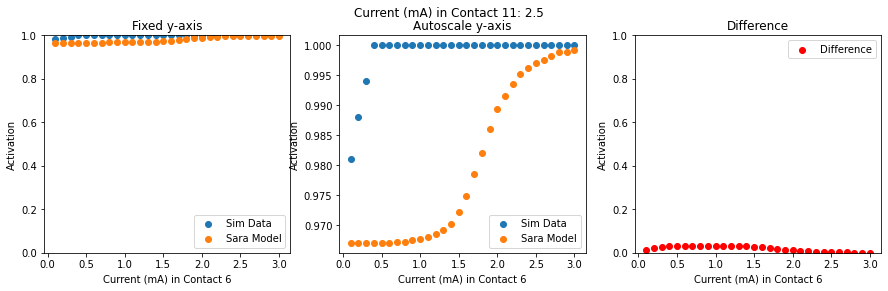

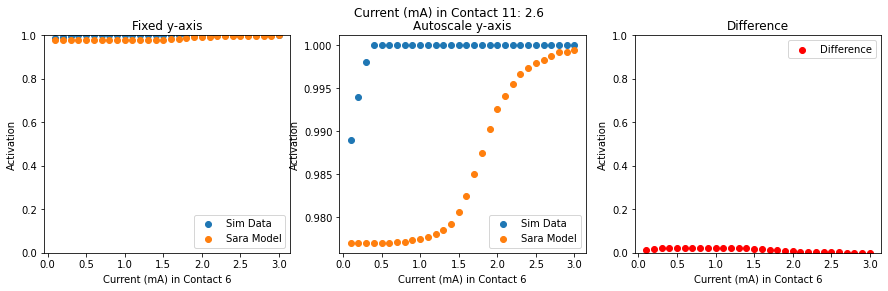

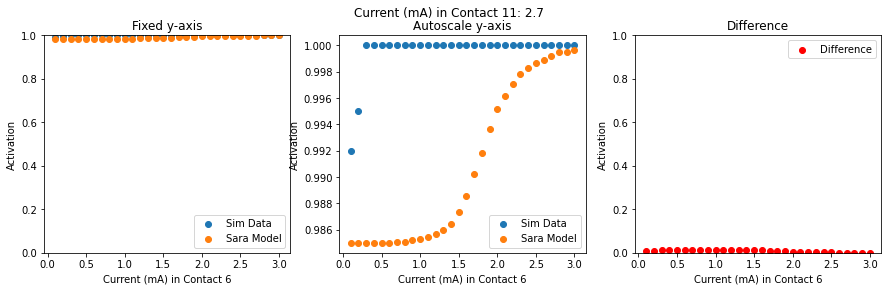

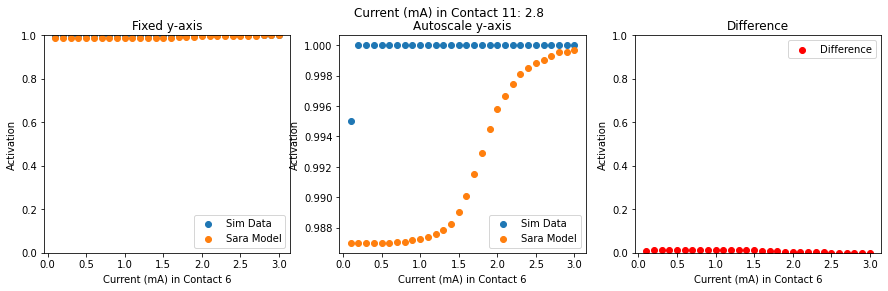

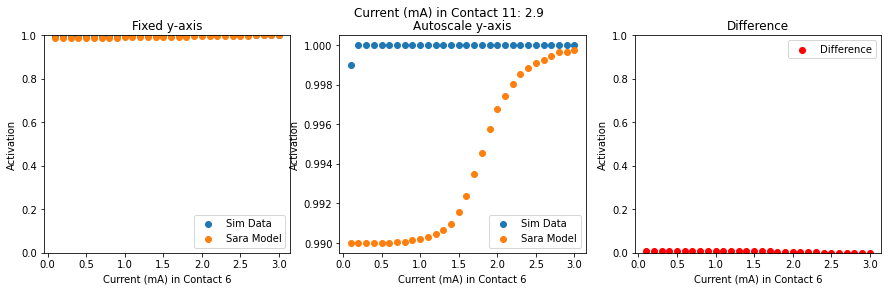

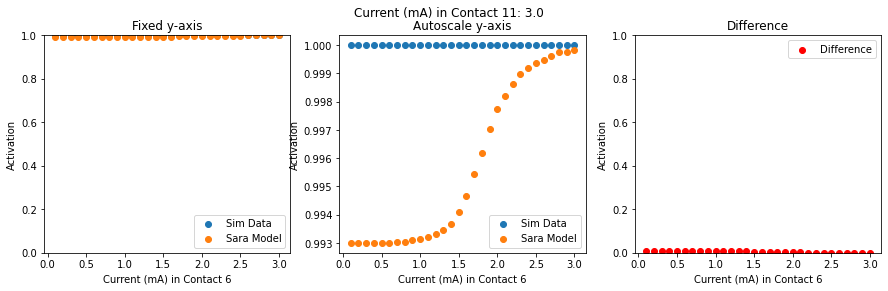

In [31]:
for i in range(len(X)):
    fig, ax = plt.subplots(nrows = 1, ncols = 3)
    fig.set_size_inches(15, 4)
    fig.suptitle('Current (mA) in Contact 11: {}'.format(round(X[i],1)))
    ax[0].set_ylim([0, 1])
    ax[0].scatter(X, all_ys_multcontact[i])
    ax[0].scatter(X, overlap[i])
    ax[0].set_xlabel('Current (mA) in Contact 6')
    ax[0].set_ylabel('Activation')
    ax[0].set_title('Fixed y-axis')
    ax[0].legend(['Sim Data', 'Sara Model'], loc = 'lower right')
    
    ax[1].scatter(X, all_ys_multcontact[i])
    ax[1].scatter(X, overlap[i])
    ax[1].set_xlabel('Current (mA) in Contact 6')
    ax[1].set_ylabel('Activation')
    ax[1].set_title('Autoscale y-axis')
    ax[1].legend(['Sim Data', 'Sara Model'], loc = 'lower right')
    
    ax[2].set_ylim([0, 1])
    ax[2].scatter(X, all_ys_multcontact[i]-overlap[i], color = 'red')
    ax[2].set_xlabel('Current (mA) in Contact 6')
    ax[2].set_ylabel('Activation')
    ax[2].set_title('Difference')
    ax[2].legend(['Difference'], loc = 'upper right')
    plt.show()

In [20]:
thetas_overlap = []
preds_overlap = []

Final loss: 8.42e-05
a1: -0.003, a2: 0.962, a3: 4.657, a4: 1.828


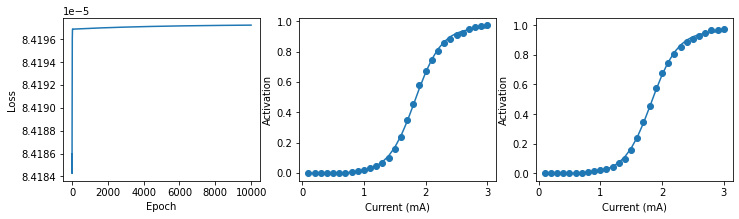

Final loss: 8.42e-05
a1: -0.003, a2: 0.962, a3: 4.657, a4: 1.828


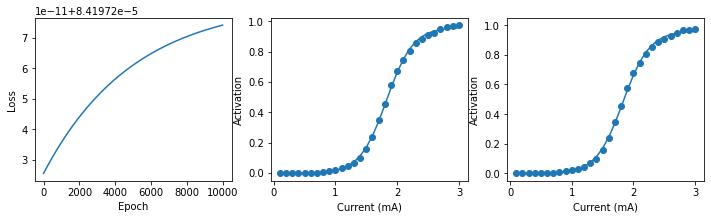

Final loss: 8.42e-05
a1: -0.003, a2: 0.962, a3: 4.657, a4: 1.828


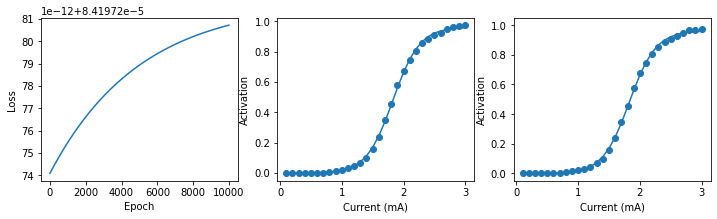

Final loss: 8.37e-05
a1: -0.0, a2: 0.962, a3: 4.657, a4: 1.828


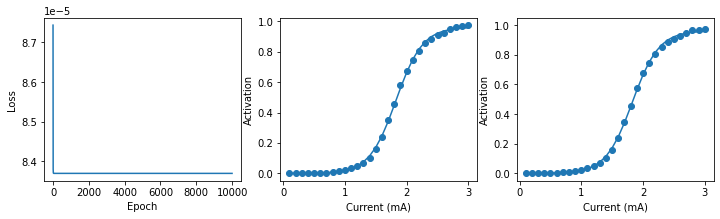

Final loss: 8.2e-05
a1: 0.01, a2: 0.962, a3: 4.657, a4: 1.828


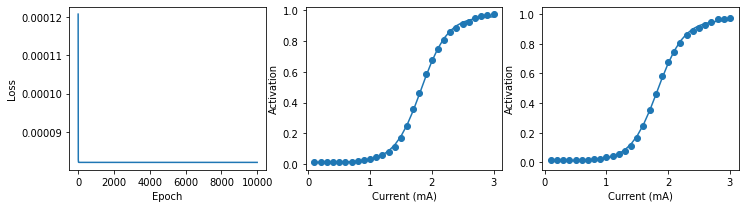

Final loss: 8.14e-05
a1: 0.014, a2: 0.963, a3: 4.657, a4: 1.828


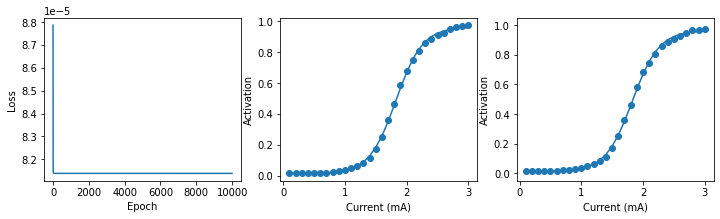

Final loss: 7.96e-05
a1: 0.025, a2: 0.963, a3: 4.657, a4: 1.828


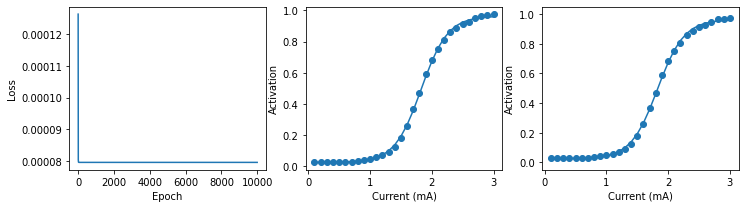

Final loss: 7.76e-05
a1: 0.037, a2: 0.964, a3: 4.657, a4: 1.828


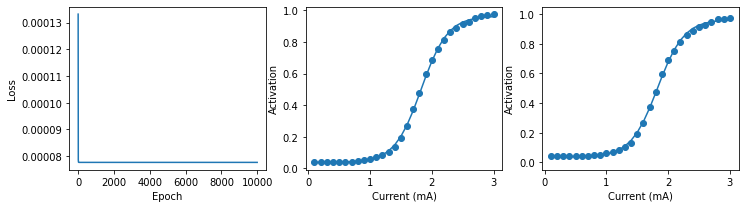

Final loss: 7.65e-05
a1: 0.044, a2: 0.964, a3: 4.657, a4: 1.828


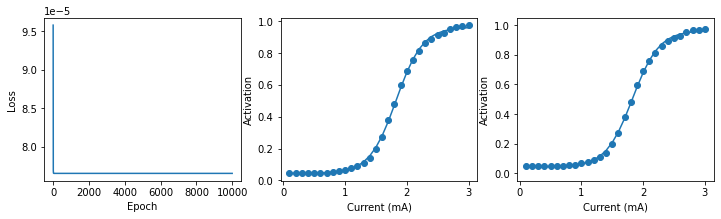

Final loss: 7.15e-05
a1: 0.076, a2: 0.965, a3: 4.657, a4: 1.828


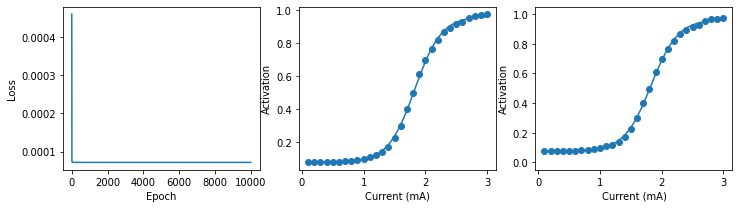

Final loss: 6.52e-05
a1: 0.118, a2: 0.967, a3: 4.657, a4: 1.828


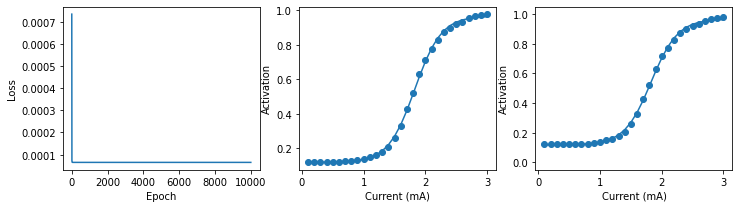

Final loss: 5.55e-05
a1: 0.186, a2: 0.969, a3: 4.658, a4: 1.828


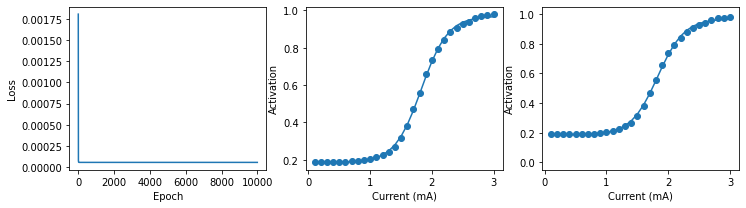

Final loss: 4.42e-05
a1: 0.275, a2: 0.973, a3: 4.658, a4: 1.828


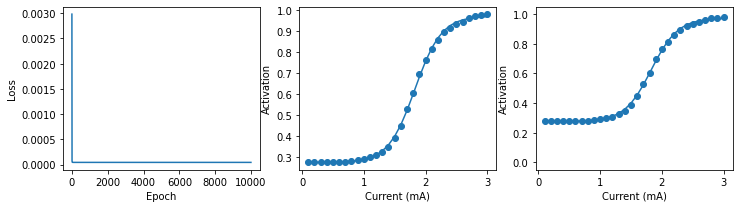

Final loss: 3.42e-05
a1: 0.362, a2: 0.976, a3: 4.658, a4: 1.828


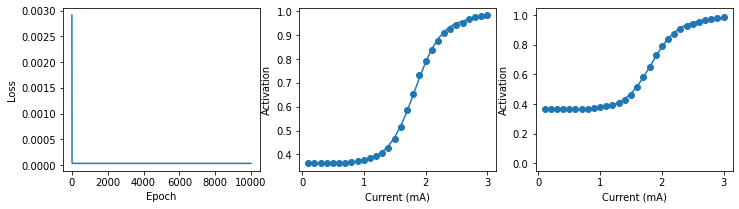

Final loss: 2.48e-05
a1: 0.457, a2: 0.979, a3: 4.659, a4: 1.828


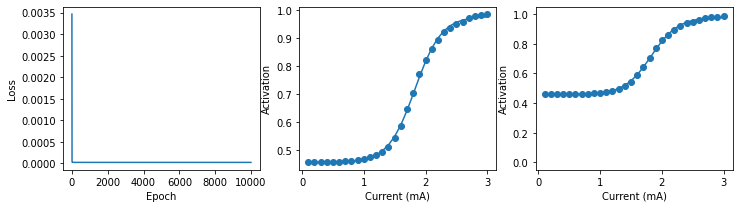

Final loss: 1.63e-05
a1: 0.56, a2: 0.983, a3: 4.659, a4: 1.828


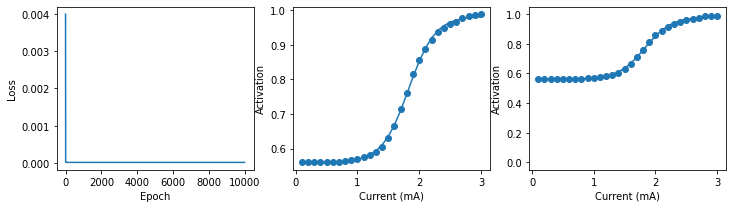

Final loss: 9.7e-06
a1: 0.661, a2: 0.987, a3: 4.659, a4: 1.828


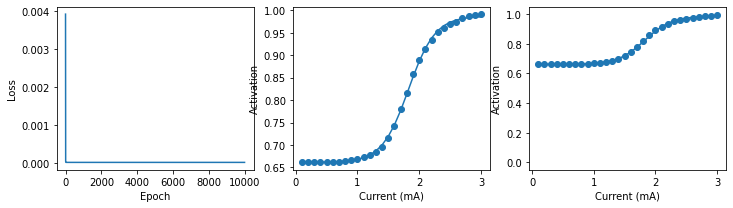

Final loss: 5.3e-06
a1: 0.748, a2: 0.99, a3: 4.659, a4: 1.828


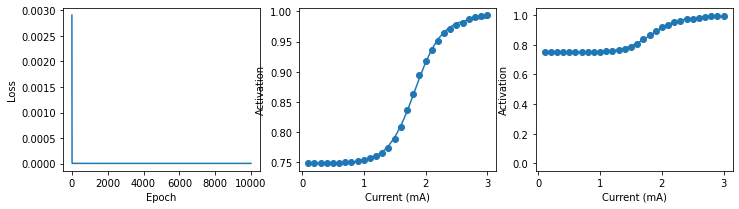

Final loss: 3e-06
a1: 0.81, a2: 0.993, a3: 4.659, a4: 1.828


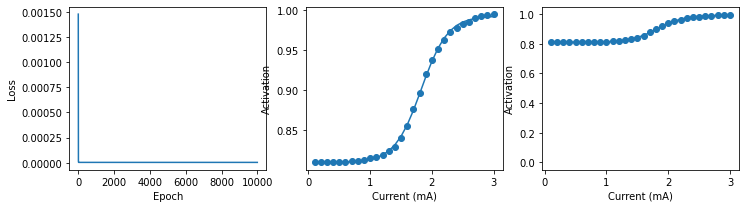

Final loss: 1.7e-06
a1: 0.859, a2: 0.995, a3: 4.659, a4: 1.828


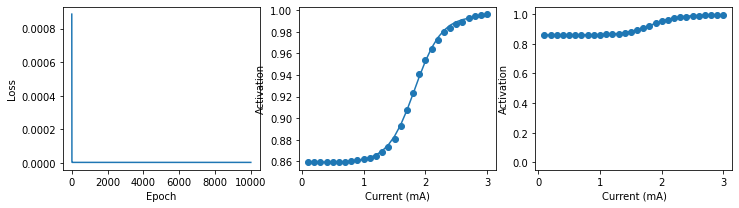

Final loss: 1e-06
a1: 0.89, a2: 0.996, a3: 4.659, a4: 1.828


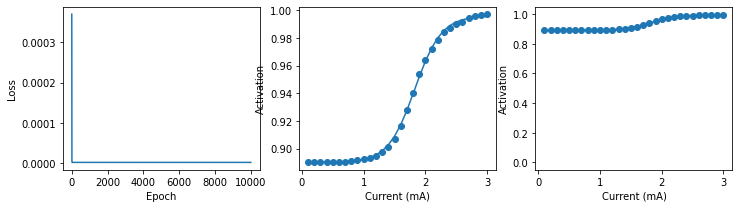

Final loss: 6e-07
a1: 0.918, a2: 0.997, a3: 4.659, a4: 1.828


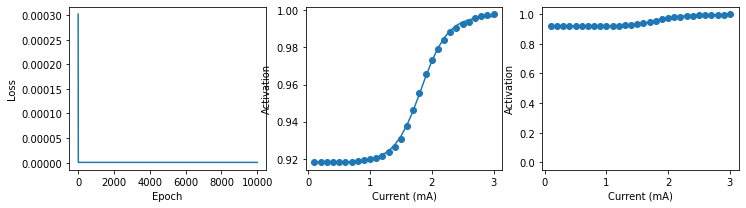

Final loss: 3e-07
a1: 0.944, a2: 0.998, a3: 4.659, a4: 1.828


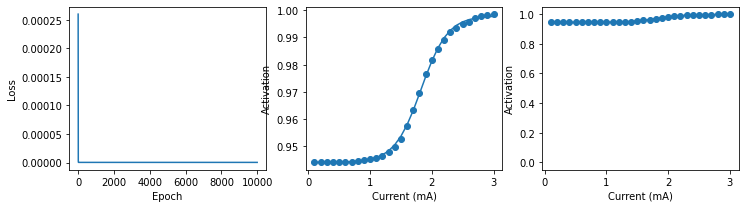

Final loss: 2e-07
a1: 0.954, a2: 0.998, a3: 4.659, a4: 1.828


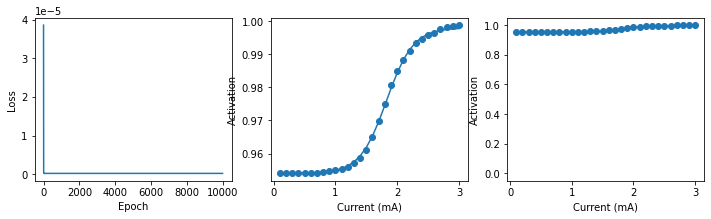

Final loss: 1e-07
a1: 0.967, a2: 0.999, a3: 4.659, a4: 1.828


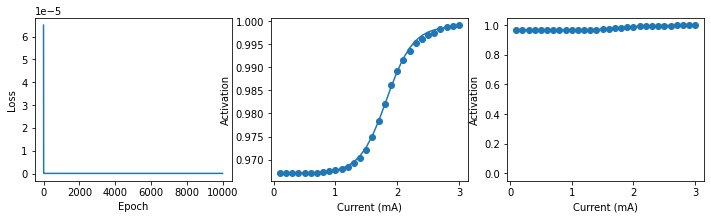

Final loss: 0.0
a1: 0.977, a2: 0.999, a3: 4.659, a4: 1.828


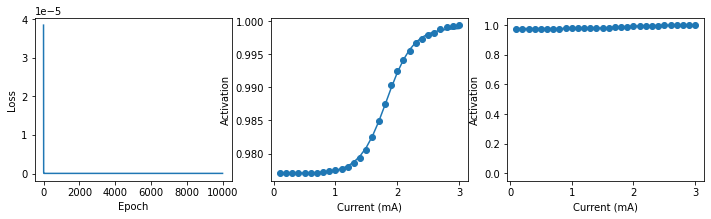

Final loss: 0.0
a1: 0.985, a2: 0.999, a3: 4.659, a4: 1.828


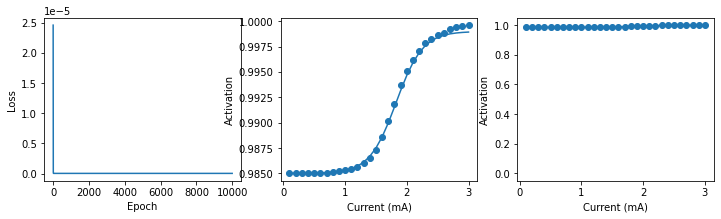

Final loss: 0.0
a1: 0.987, a2: 1.0, a3: 4.659, a4: 1.828


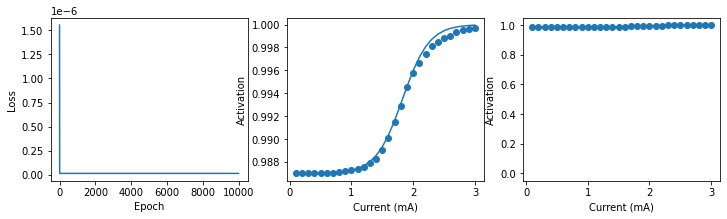

Final loss: 0.0
a1: 0.99, a2: 1.0, a3: 4.659, a4: 1.828


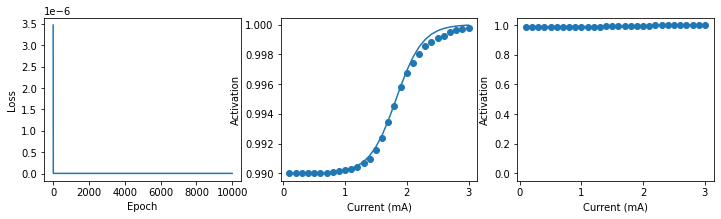

Final loss: 0.0
a1: 0.993, a2: 1.0, a3: 4.659, a4: 1.828


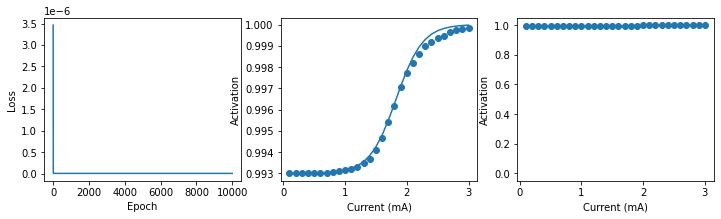

In [27]:
for i in range(len(X)):    
    theta, loss_hist = stochastic_grad_descent(X, overlap[i])
    final_loss = round(loss_hist[-1],7)
    theta = np.round(theta,3)
    print('Final loss: {}'.format(final_loss))
    print('a1: {}, a2: {}, a3: {}, a4: {}'.format(theta[0],theta[1],theta[2],theta[3]))
    fig, ax = plt.subplots(nrows = 1, ncols = 3)
    fig.set_size_inches(12, 3)
    ax[0].plot(loss_hist)
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    
    preds = [model(xi, theta) for xi in X]
    ax[1].plot(X, preds)
    ax[1].scatter(X, overlap[i])
    ax[1].set_xlabel('Current (mA)')
    ax[1].set_ylabel('Activation')
    
    ax[2].set_ylim([-0.05, 1.05])
    ax[2].plot(X, preds)
    ax[2].scatter(X, overlap[i])
    ax[2].set_xlabel('Current (mA)')
    ax[2].set_ylabel('Activation')
    plt.show()
    
    thetas_overlap.append(theta)
    preds_overlap.append(preds)

In [23]:
theta, loss_hist = stochastic_grad_descent(X, overlap[0])

In [ ]:
preds = [model(xi, theta) for xi in X]
ax[1].plot(X, preds)
ax[1].scatter(X, overlap[0])
ax[1].set_xlabel('Current (mA)')
ax[1].set_ylabel('Activation')
plt.show()

In [38]:
%matplotlib qt
x_ax,y_ax = np.meshgrid(X, X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Simulation Data')
ax.set_xlabel('Contact 6 Current (mA)')
ax.set_ylabel('Contact 11 Current (mA)')
ax.set_zlabel('Muscle 7 Activation')
ax.plot_surface(x_ax,y_ax,all_ys_multcontact,cmap='plasma')

In [39]:
x_ax,y_ax = np.meshgrid(X, X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Saras Model')
ax.set_xlabel('Contact 6 Current (mA)')
ax.set_ylabel('Contact 11 Current (mA)')
ax.set_zlabel('Muscle 7 Activation')
ax.plot_surface(x_ax,y_ax,overlap,cmap ='plasma')

In [40]:
x_ax,y_ax = np.meshgrid(X, X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Difference in Activation')
ax.set_xlabel('Contact 6 Current (mA)')
ax.set_ylabel('Contact 11 Current (mA)')
ax.set_zlabel('Difference in Muscle 7 Activation')
ax.plot_surface(x_ax,y_ax,all_ys_multcontact-overlap,cmap ='plasma')

# Double Sigmoid Model

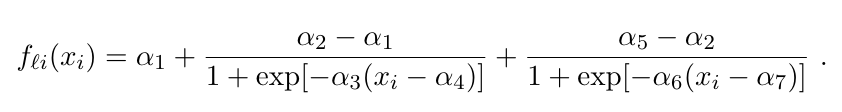

In [73]:
def double_sig_model(xi, theta):
    a1, a2, a3, a4, a5, a6, a7 = theta[0], theta[1], theta[2], theta[3], theta[4], theta[5], theta[6]
    return a1 + (a2-a1)/(1+math.exp(-a3*(xi-a4))) + (a5-a2)/(1+math.exp(-a6*(xi-a7)))

def compute_square_loss_double_sig(xi, yi, theta):
    loss = (double_sig_model(xi, theta)-yi)**2
    return(loss)

def compute_square_loss_gradient_double_sig(xi, yi, theta):
    a1, a2, a3, a4, a5, a6, a7 = theta[0], theta[1], theta[2], theta[3], theta[4], theta[5], theta[6]
    
    df_da1 = 1 - 1/(1+math.exp(-a3*(xi-a4)))
    df_da2 = 1/(1+math.exp(-a3*(xi-a4))) - 1/(1+math.exp(-a6*(xi-a7)))
    df_da3 = (-1*(a2-a1)/((1+math.exp(-a3*(xi-a4)))**2)) * math.exp(-a3*(xi-a4))*(a4-xi)
    df_da4 = (-1*(a2-a1)/((1+math.exp(-a3*(xi-a4)))**2)) * math.exp(-a3*(xi-a4))*a3
    
    df_da5 = 1/(1+math.exp(-a6*(xi-a7)))
    df_da6 = (-1*(a5-a2)/((1+math.exp(-a6*(xi-a7)))**2)) * math.exp(-a6*(xi-a7))*(a7-xi)
    df_da7 = (-1*(a5-a2)/((1+math.exp(-a6*(xi-a7)))**2)) * math.exp(-a6*(xi-a7))*a6
    
    grad_J = np.array([2*df_da1*(double_sig_model(xi, theta)-yi), 2*df_da2*(double_sig_model(xi, theta)-yi), \
                       2*df_da3*(double_sig_model(xi, theta)-yi), 2*df_da4*(double_sig_model(xi, theta)-yi), \
                       2*df_da5*(double_sig_model(xi, theta)-yi), 2*df_da6*(double_sig_model(xi, theta)-yi), \
                       2*df_da7*(double_sig_model(xi, theta)-yi)])
    return(grad_J)

In [74]:
def stochastic_grad_descent_double_sig(X, y, theta = np.array([0.0,0.5,1.0,1.5,1.0,1.0,1.5]), num_epoch=10000):
    num_instances, num_features = len(y)
    loss_hist = np.zeros(num_epoch) #Initialize loss_hist
    
    for n in range(num_epoch):
        loss = 0
        for i in range(len(X)):
            xi = X[i]
            yi = y[i]
            grad_f = compute_square_loss_gradient_double_sig(xi,yi,theta)
            #step size changes with 1/sqrt(t)
            theta -= 0.01*grad_f
            loss += compute_square_loss_double_sig(xi,yi,theta)
        loss_hist[n]=loss/num_instances
        
    return(theta,loss_hist)

## Fit to double sigmoid

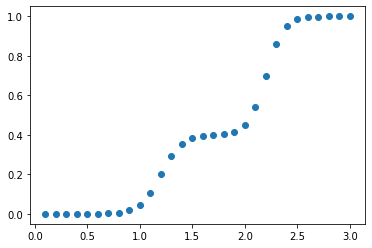

In [84]:
test_X = np.arange(0.1,3.1,0.1)
theta_true = np.array([0.0,0.4,10.1,1.2,1.0,12,2.2])
test_y = np.array([double_sig_model(xi, theta_true) for xi in test_X])
plt.scatter(test_X,test_y)

Observations of double sigmoid model 
 - The model fits, but it takes many epochs to get a good fit... very sensitive to initialization of theta. If theta is initialized to 0s, it takes 500,000 epochs to get a good fit.
 - Additionally, while the predictions of the model are accurate, the parameters of the model are quite different from the parameters of the original data.
     - Parameters of the model that produced the data, parameters of fit model:
         - **a1: 0.0, 0.4**
         - **a2: 0.4, -0.001**
         - **a3: 10.1, -9.877**
         - a4: 1.2, 1.2
         - **a5: 1.0, 0.599**
         - a6: 12, 11.933
         - a7: 2.2, 2.2

Final loss: 5e-07
a1: 0.4, a2: -0.001, a3: -9.877, a4: 1.2, , a5: 0.599, , a6: 11.933, a7: 2.2


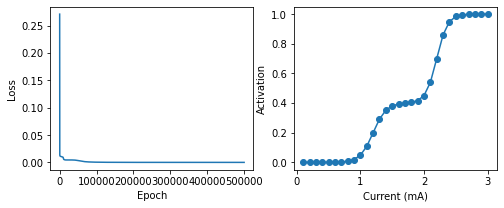

In [86]:
theta, loss_hist = stochastic_grad_descent_double_sig(test_X, test_y, theta = np.zeros(7), num_epoch=500000)
final_loss = round(loss_hist[-1],7)
theta = np.round(theta,3)
print('Final loss: {}'.format(final_loss))
print('a1: {}, a2: {}, a3: {}, a4: {}, , a5: {}, , a6: {}, a7: {}'.format(theta[0],theta[1],theta[2],theta[3],theta[4],theta[5],theta[6]))
fig, ax = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(8, 3)
ax[0].plot(loss_hist)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')

preds = [double_sig_model(xi, theta) for xi in test_X]
ax[1].plot(test_X, preds)
ax[1].scatter(test_X, test_y)
ax[1].set_xlabel('Current (mA)')
ax[1].set_ylabel('Activation')
plt.show()

# theta_true = np.array([0.0,0.4,10.1,1.2,1.0,12,2.2])

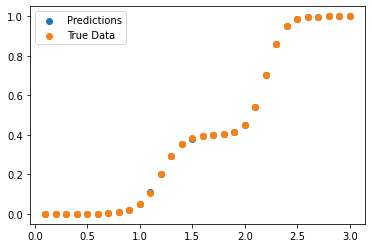

In [90]:
# a1: 0.4, a2: -0.001, a3: -9.877, a4: 1.2, , a5: 0.599, , a6: 11.933, a7: 2.2
theta_true = np.array([0.0,0.4,10.1,1.2,1.0,12,2.2])
theta_guess = np.array([0.4,-0.001,-9.877, 1.2,0.599,11.933,2.2])
plt.scatter(test_X,preds, label = 'Predictions')
plt.scatter(test_X,test_y, label = 'True Data')
plt.legend()
plt.show()

# Ben's Data

### Axillary1500uA, Contact 13

#### Curve 1 = PD, Curve 2 = MD, Curve 3 = AD

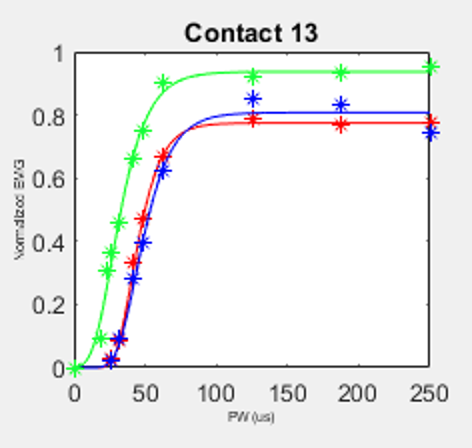

In [48]:
f6 = '/Volumes/L_MillerLab/limblab/User_folders/Aajan/RecruitmentCurveFigures/Axillary1500uA/Axillary1500uA_5_1.csv'
f7 = '/Volumes/L_MillerLab/limblab/User_folders/Aajan/RecruitmentCurveFigures/Axillary1500uA/Axillary1500uA_5_2.csv'
f8 = '/Volumes/L_MillerLab/limblab/User_folders/Aajan/RecruitmentCurveFigures/Axillary1500uA/Axillary1500uA_5_3.csv'

In [49]:
Axillary1500uA_5_1 = np.genfromtxt(f6, delimiter=',').T
Axillary1500uA_5_2 = np.genfromtxt(f7, delimiter=',').T
Axillary1500uA_5_3 = np.genfromtxt(f8, delimiter=',').T

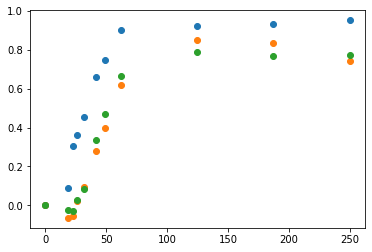

In [50]:
plt.scatter(Axillary1500uA_5_1[0], Axillary1500uA_5_1[1])
plt.scatter(Axillary1500uA_5_2[0], Axillary1500uA_5_2[1])
plt.scatter(Axillary1500uA_5_3[0], Axillary1500uA_5_3[1])

In [51]:
Xs = [Axillary1500uA_5_1[0], Axillary1500uA_5_2[0], Axillary1500uA_5_3[0]]
ys = [Axillary1500uA_5_1[1], Axillary1500uA_5_2[1], Axillary1500uA_5_3[1]]
thetas = []
preds_l = []

Final loss: 0.0012755
a1: -0.626, a2: 0.942, a3: 0.059, a4: 11.643, , a5: 0.943, , a6: 0.008, , a7: 149.642


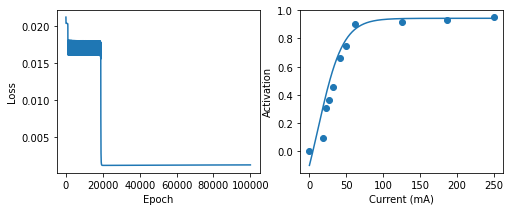

Final loss: 0.0037342
a1: -0.657, a2: 0.698, a3: 0.06, a4: 11.714, , a5: 0.823, , a6: 0.024, , a7: 146.986


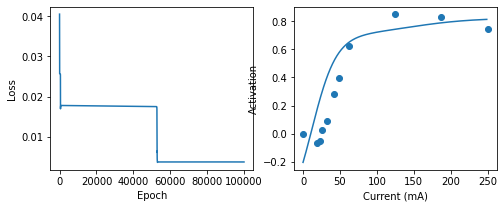

Final loss: 0.0027833
a1: -0.604, a2: 0.661, a3: 0.058, a4: 12.043, , a5: 0.811, , a6: 0.023, , a7: 148.087


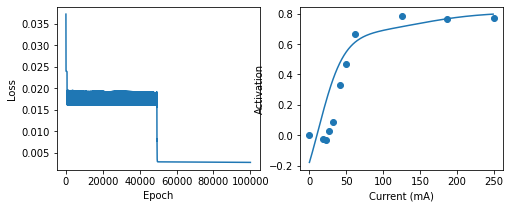

In [54]:
for X, y in zip(Xs, ys):    
    theta, loss_hist = stochastic_grad_descent_double_sig(X, y, theta = np.array([0.0,0.5,1.0,10,1.0,0.3,150]), num_epoch = 100000)
    final_loss = round(loss_hist[-1],7)
    theta = np.round(theta,3)
    print('Final loss: {}'.format(final_loss))
    print('a1: {}, a2: {}, a3: {}, a4: {}, , a5: {}, , a6: {}, , a7: {}'.format(theta[0],theta[1],theta[2],theta[3],theta[4],theta[5],theta[6]))
    fig, ax = plt.subplots(nrows = 1, ncols = 2)
    fig.set_size_inches(8, 3)
    ax[0].plot(loss_hist)
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    
    X_pred = np.arange(250)
    
    preds = [double_sig_model(xi, theta) for xi in X_pred]
    ax[1].plot(X_pred, preds)
    ax[1].scatter(X, y)
    ax[1].set_xlabel('Current (mA)')
    ax[1].set_ylabel('Activation')
    plt.show()
    
    thetas.append(theta)
    preds_l.append(preds)

Final loss: 0.0014224
a1: 0.09, a2: 0.966, a3: 0.098, a4: 38.616


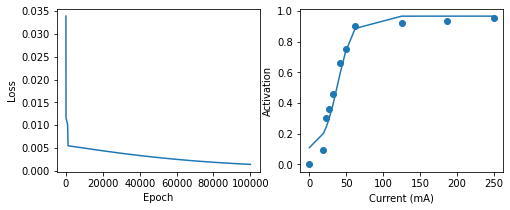

Final loss: 0.0005329
a1: -0.06, a2: 0.807, a3: 0.101, a4: 48.117


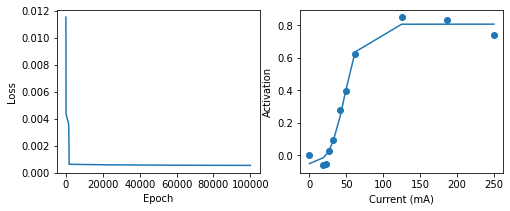

Final loss: 0.0002025
a1: -0.034, a2: 0.776, a3: 0.127, a4: 45.426


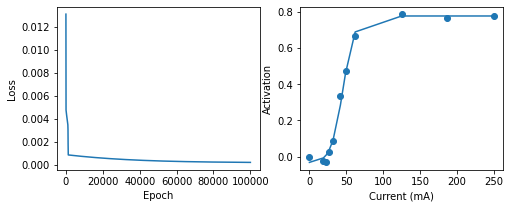

In [70]:
for X, y in zip(Xs, ys):
    theta, loss_hist = stochastic_grad_descent_single_sig(X, y, theta = np.array([0.0,1.0,1.0,50]), num_epoch = 100000)
    final_loss = round(loss_hist[-1],7)
    theta = np.round(theta,3)
    print('Final loss: {}'.format(final_loss))
    print('a1: {}, a2: {}, a3: {}, a4: {}'.format(theta[0],theta[1],theta[2],theta[3]))
    fig, ax = plt.subplots(nrows = 1, ncols = 2)
    fig.set_size_inches(8, 3)
    ax[0].plot(loss_hist)
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    
    preds = [single_sig_model(xi, theta) for xi in X]
    ax[1].plot(X, preds)
    ax[1].scatter(X, y)
    ax[1].set_xlabel('Current (mA)')
    ax[1].set_ylabel('Activation')
    plt.show()
    
    thetas.append(theta)
    preds_l.append(preds)

### Axillary1500uA, Contact 4

#### Curve 1 = PD, Curve 2 = MD, Curve 3 = AD

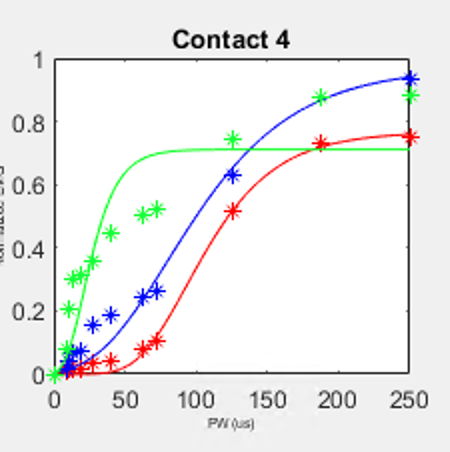

In [13]:
f1 = '/Volumes/L_MillerLab/limblab/User_folders/Aajan/RecruitmentCurveFigures/Axillary1500uA/Axillary1500uA_14_1.csv'
f2 = '/Volumes/L_MillerLab/limblab/User_folders/Aajan/RecruitmentCurveFigures/Axillary1500uA/Axillary1500uA_14_2.csv'
f3 = '/Volumes/L_MillerLab/limblab/User_folders/Aajan/RecruitmentCurveFigures/Axillary1500uA/Axillary1500uA_14_3.csv'

In [14]:
Axillary1500uA_14_1 = np.genfromtxt(f1, delimiter=',').T
Axillary1500uA_14_2 = np.genfromtxt(f2, delimiter=',').T
Axillary1500uA_14_3 = np.genfromtxt(f3, delimiter=',').T

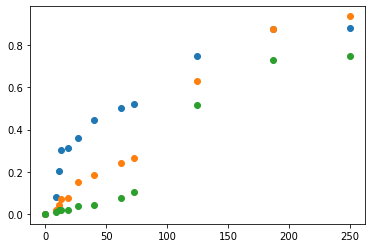

In [15]:
plt.scatter(Axillary1500uA_14_1[0], Axillary1500uA_14_1[1])
plt.scatter(Axillary1500uA_14_2[0], Axillary1500uA_14_2[1])
plt.scatter(Axillary1500uA_14_3[0], Axillary1500uA_14_3[1])

In [16]:
Xs = [Axillary1500uA_14_1[0], Axillary1500uA_14_2[0], Axillary1500uA_14_3[0]]
ys = [Axillary1500uA_14_1[1], Axillary1500uA_14_2[1], Axillary1500uA_14_3[1]]
thetas = []
preds_l = []

Final loss: 0.000967
a1: -0.2, a2: 0.532, a3: 0.075, a4: 10.613, , a5: 0.945, , a6: 0.031, , a7: 149.931


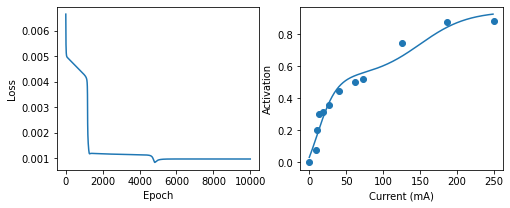

Final loss: 0.00025
a1: -0.32, a2: 0.366, a3: 0.036, a4: 10.366, , a5: 1.019, , a6: 0.028, , a7: 149.849


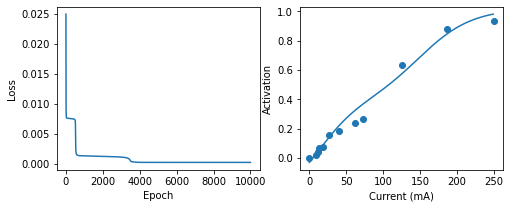

Final loss: 0.0010821
a1: -0.037, a2: 0.056, a3: 0.677, a4: 10.197, , a5: 0.911, , a6: 0.026, , a7: 149.716


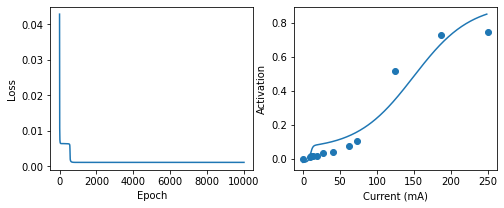

In [17]:
for X, y in zip(Xs, ys):    
    theta, loss_hist = stochastic_grad_descent_double_sig(X, y, theta = np.array([0.0,0.5,1.0,10,1.0,0.3,150]))
    final_loss = round(loss_hist[-1],7)
    theta = np.round(theta,3)
    print('Final loss: {}'.format(final_loss))
    print('a1: {}, a2: {}, a3: {}, a4: {}, , a5: {}, , a6: {}, , a7: {}'.format(theta[0],theta[1],theta[2],theta[3],theta[4],theta[5],theta[6]))
    fig, ax = plt.subplots(nrows = 1, ncols = 2)
    fig.set_size_inches(8, 3)
    ax[0].plot(loss_hist)
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    
    X_pred = np.arange(250)
    
    preds = [double_sig_model(xi, theta) for xi in X_pred]
    ax[1].plot(X_pred, preds)
    ax[1].scatter(X, y)
    ax[1].set_xlabel('Current (mA)')
    ax[1].set_ylabel('Activation')
    plt.show()
    
    thetas.append(theta)
    preds_l.append(preds)

### LateralPectoral800ua, Contact 5

#### Curve 1 = LP, Curve 2 = UP

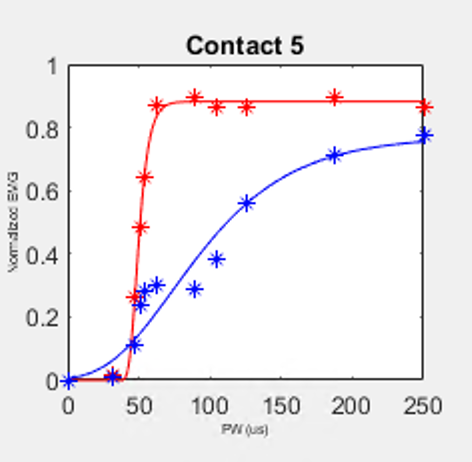

In [42]:
f4 = '/Volumes/L_MillerLab/limblab/User_folders/Aajan/RecruitmentCurveFigures/LateralPectoral800uA/LateralPectoral800uA_13_1.csv'
f5 = '/Volumes/L_MillerLab/limblab/User_folders/Aajan/RecruitmentCurveFigures/LateralPectoral800uA/LateralPectoral800uA_13_2.csv'

In [43]:
LateralPectoral800uA_13_1 = np.genfromtxt(f4, delimiter=',').T
LateralPectoral800uA_13_2 = np.genfromtxt(f5, delimiter=',').T

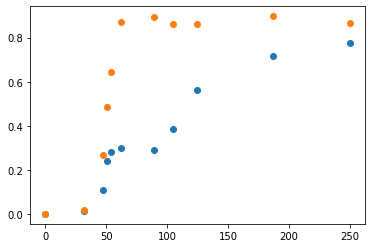

In [44]:
plt.scatter(LateralPectoral800uA_13_1[0], LateralPectoral800uA_13_1[1])
plt.scatter(LateralPectoral800uA_13_2[0], LateralPectoral800uA_13_2[1])

In [45]:
Xs = [LateralPectoral800uA_13_1[0], LateralPectoral800uA_13_2[0]]
ys = [LateralPectoral800uA_13_1[1], LateralPectoral800uA_13_2[1]]
thetas = []
preds_l = []

Final loss: 0.0004152
a1: -0.056, a2: 0.089, a3: 1.664, a4: 47.327, , a5: 0.766, , a6: 0.029, , a7: 101.424


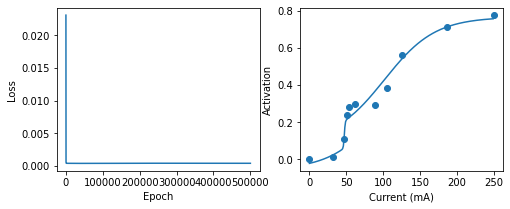

Final loss: 3.51e-05
a1: 0.006, a2: 0.902, a3: 0.261, a4: 50.466, , a5: 0.872, , a6: 0.825, , a7: 99.932


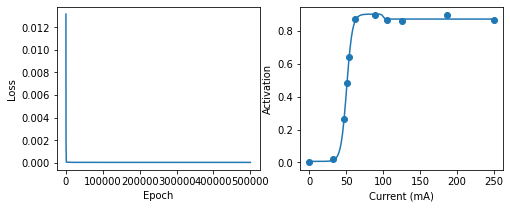

In [46]:
for X, y in zip(Xs, ys):    
    theta, loss_hist = stochastic_grad_descent_double_sig(X, y, theta = np.array([0.0,0.5,1.0,50,1.0,0.3,100]), num_epoch=500000)
    final_loss = round(loss_hist[-1],7)
    theta = np.round(theta,3)
    print('Final loss: {}'.format(final_loss))
    print('a1: {}, a2: {}, a3: {}, a4: {}, , a5: {}, , a6: {}, , a7: {}'.format(theta[0],theta[1],theta[2],theta[3],theta[4],theta[5],theta[6]))
    fig, ax = plt.subplots(nrows = 1, ncols = 2)
    fig.set_size_inches(8, 3)
    ax[0].plot(loss_hist)
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    
    X_pred = np.arange(250)
    
    preds = [double_sig_model(xi, theta) for xi in X_pred]
    ax[1].plot(X_pred, preds)
    ax[1].scatter(X, y)
    ax[1].set_xlabel('Current (mA)')
    ax[1].set_ylabel('Activation')
    plt.show()
    
    thetas.append(theta)
    preds_l.append(preds)

### RadialCuff1000ua, Contact 1

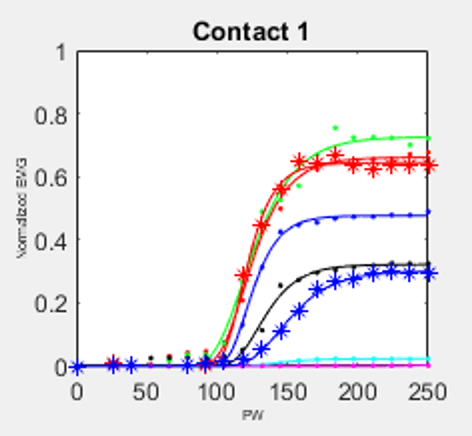

In [37]:
f9 = '/Volumes/fsmresfiles/Basic_Sciences/Phys/L_MillerLab/limblab/User_folders/Aajan/RecruitmentCurveFigures/Radial1000uA/Radial1000uA_17_1.csv'
f10 = '/Volumes/fsmresfiles/Basic_Sciences/Phys/L_MillerLab/limblab/User_folders/Aajan/RecruitmentCurveFigures/Radial1000uA/Radial1000uA_17_2.csv'
f11 = '/Volumes/fsmresfiles/Basic_Sciences/Phys/L_MillerLab/limblab/User_folders/Aajan/RecruitmentCurveFigures/Radial1000uA/Radial1000uA_17_3.csv'
f12 = '/Volumes/fsmresfiles/Basic_Sciences/Phys/L_MillerLab/limblab/User_folders/Aajan/RecruitmentCurveFigures/Radial1000uA/Radial1000uA_17_4.csv'
f13 = '/Volumes/fsmresfiles/Basic_Sciences/Phys/L_MillerLab/limblab/User_folders/Aajan/RecruitmentCurveFigures/Radial1000uA/Radial1000uA_17_5.csv'
f14 = '/Volumes/fsmresfiles/Basic_Sciences/Phys/L_MillerLab/limblab/User_folders/Aajan/RecruitmentCurveFigures/Radial1000uA/Radial1000uA_17_6.csv'
f15 = '/Volumes/fsmresfiles/Basic_Sciences/Phys/L_MillerLab/limblab/User_folders/Aajan/RecruitmentCurveFigures/Radial1000uA/Radial1000uA_17_7.csv'
f16 = '/Volumes/fsmresfiles/Basic_Sciences/Phys/L_MillerLab/limblab/User_folders/Aajan/RecruitmentCurveFigures/Radial1000uA/Radial1000uA_17_8.csv'

In [38]:
Radial1000uA_17_1 = np.genfromtxt(f9, delimiter=',').T
Radial1000uA_17_2 = np.genfromtxt(f10, delimiter=',').T
Radial1000uA_17_3 = np.genfromtxt(f11, delimiter=',').T
Radial1000uA_17_4 = np.genfromtxt(f12, delimiter=',').T
Radial1000uA_17_5 = np.genfromtxt(f13, delimiter=',').T
Radial1000uA_17_6 = np.genfromtxt(f14, delimiter=',').T
Radial1000uA_17_7 = np.genfromtxt(f15, delimiter=',').T
Radial1000uA_17_8 = np.genfromtxt(f16, delimiter=',').T

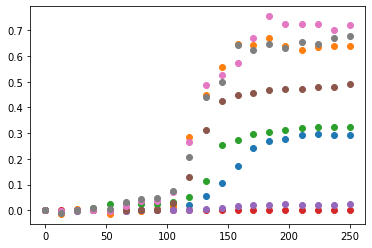

In [39]:
plt.scatter(Radial1000uA_17_1[0],Radial1000uA_17_1[1])
plt.scatter(Radial1000uA_17_2[0],Radial1000uA_17_2[1])
plt.scatter(Radial1000uA_17_3[0],Radial1000uA_17_3[1])
plt.scatter(Radial1000uA_17_4[0],Radial1000uA_17_4[1])
plt.scatter(Radial1000uA_17_5[0],Radial1000uA_17_5[1])
plt.scatter(Radial1000uA_17_6[0],Radial1000uA_17_6[1])
plt.scatter(Radial1000uA_17_7[0],Radial1000uA_17_7[1])
plt.scatter(Radial1000uA_17_8[0],Radial1000uA_17_8[1])

In [40]:
Xs = [Radial1000uA_17_1[0],Radial1000uA_17_2[0],Radial1000uA_17_3[0],Radial1000uA_17_4[0],Radial1000uA_17_5[0],Radial1000uA_17_6[0],Radial1000uA_17_7[0],Radial1000uA_17_8[0]]
ys = [Radial1000uA_17_1[1],Radial1000uA_17_2[1],Radial1000uA_17_3[1],Radial1000uA_17_4[1],Radial1000uA_17_5[1],Radial1000uA_17_6[1],Radial1000uA_17_7[1],Radial1000uA_17_8[1]]
thetas = []
preds_l = []

Final loss: 2.19e-05
a1: 0.0, a2: -0.004, a3: 0.998, a4: 50.001, , a5: 0.292, , a6: 0.072, , a7: 150.026


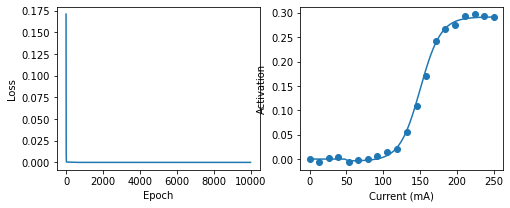

Final loss: 0.0059302
a1: -0.005, a2: 0.077, a3: 0.699, a4: 50.087, , a5: 0.721, , a6: 0.046, , a7: 149.146


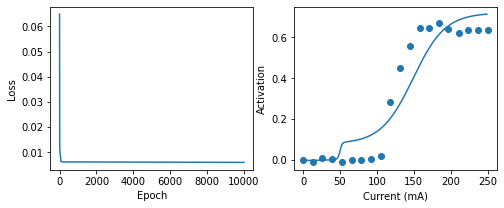

Final loss: 0.0004306
a1: 0.002, a2: 0.037, a3: 0.986, a4: 50.005, , a5: 0.337, , a6: 0.07, , a7: 149.859


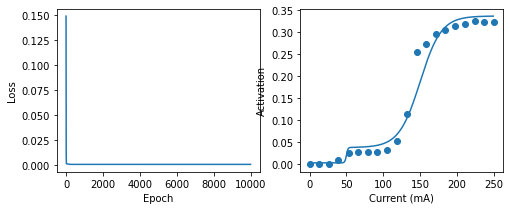

Final loss: 1e-07
a1: -0.0, a2: 0.0, a3: 0.998, a4: 50.001, , a5: 0.002, , a6: 0.292, , a7: 150.002


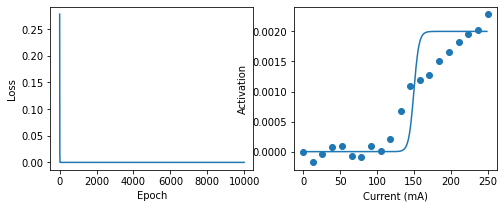

Final loss: 1.5e-06
a1: -0.0, a2: 0.001, a3: 0.998, a4: 50.001, , a5: 0.022, , a6: 0.269, , a7: 150.001


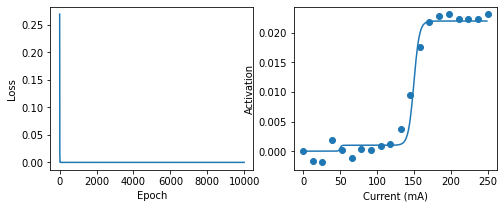

Final loss: 0.0025492
a1: -0.002, a2: 0.038, a3: 0.945, a4: 50.018, , a5: 0.539, , a6: 0.044, , a7: 149.588


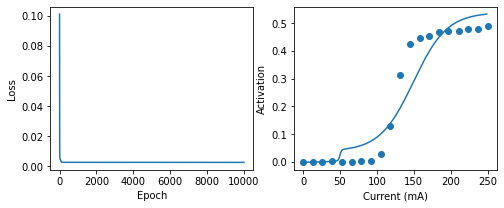

Final loss: 0.0033937
a1: -0.005, a2: 0.081, a3: 0.697, a4: 50.087, , a5: 0.795, , a6: 0.045, , a7: 149.299


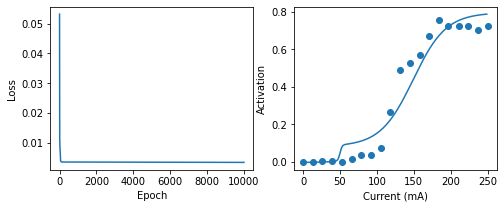

Final loss: 0.0034173
a1: -0.005, a2: 0.077, a3: 0.753, a4: 50.073, , a5: 0.733, , a6: 0.042, , a7: 149.38


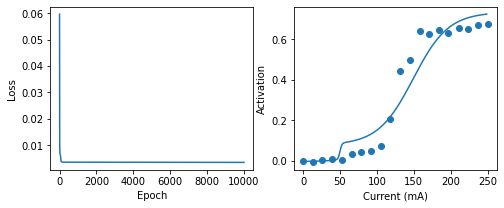

In [27]:
for X, y in zip(Xs, ys):    
    theta, loss_hist = stochastic_grad_descent_double_sig(X, y, theta = np.array([0.0,0.5,1.0,50,1.0,0.3,150]))
    final_loss = round(loss_hist[-1],7)
    theta = np.round(theta,3)
    print('Final loss: {}'.format(final_loss))
    print('a1: {}, a2: {}, a3: {}, a4: {}, , a5: {}, , a6: {}, , a7: {}'.format(theta[0],theta[1],theta[2],theta[3],theta[4],theta[5],theta[6]))
    fig, ax = plt.subplots(nrows = 1, ncols = 2)
    fig.set_size_inches(8, 3)
    ax[0].plot(loss_hist)
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    
    X_pred = np.arange(250)
    
    preds = [double_sig_model(xi, theta) for xi in X_pred]
    ax[1].plot(X_pred, preds)
    ax[1].scatter(X, y)
    ax[1].set_xlabel('Current (mA)')
    ax[1].set_ylabel('Activation')
    plt.show()
    
    thetas.append(theta)
    preds_l.append(preds)

Final loss: 2.2e-05
a1: -0.002, a2: 0.291, a3: 0.073, a4: 150.175


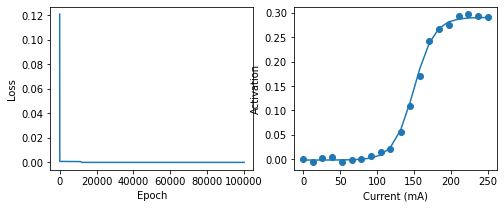

Final loss: 0.0037846
a1: 0.031, a2: 0.695, a3: 0.065, a4: 141.06


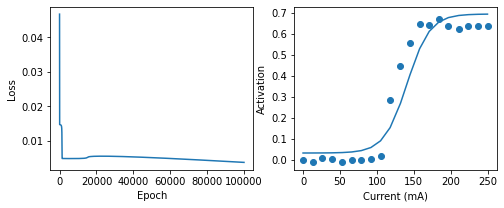

Final loss: 0.0004554
a1: 0.02, a2: 0.341, a3: 0.063, a4: 148.564


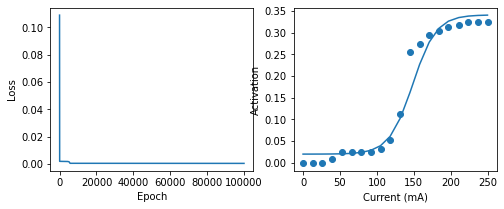

Final loss: 1e-07
a1: 0.0, a2: 0.002, a3: 1.0, a4: 150.0


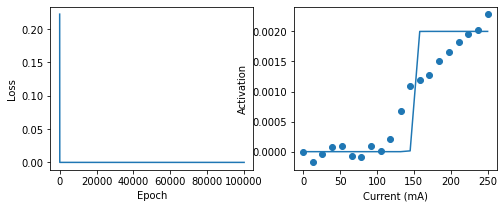

Final loss: 4e-06
a1: 0.001, a2: 0.022, a3: 0.987, a4: 149.998


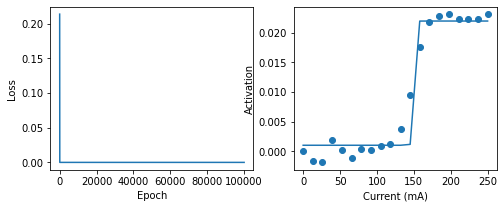

Final loss: 0.0021255
a1: 0.017, a2: 0.531, a3: 0.049, a4: 145.854


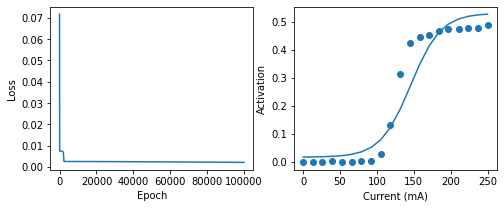

Final loss: 0.0023725
a1: 0.027, a2: 0.783, a3: 0.048, a4: 142.995


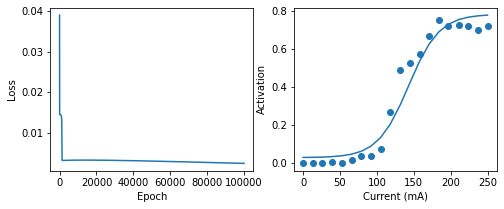

Final loss: 0.0027242
a1: 0.032, a2: 0.724, a3: 0.046, a4: 144.56


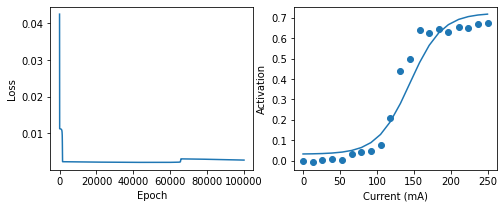

In [14]:
for X, y in zip(Xs, ys):
    theta, loss_hist = stochastic_grad_descent(X, y, theta = np.array([0.0,1.0,1.0,150]), num_epoch = 100000)
    final_loss = round(loss_hist[-1],7)
    theta = np.round(theta,3)
    print('Final loss: {}'.format(final_loss))
    print('a1: {}, a2: {}, a3: {}, a4: {}'.format(theta[0],theta[1],theta[2],theta[3]))
    fig, ax = plt.subplots(nrows = 1, ncols = 2)
    fig.set_size_inches(8, 3)
    ax[0].plot(loss_hist)
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    
    preds = [model(xi, theta) for xi in X]
    ax[1].plot(X, preds)
    ax[1].scatter(X, y)
    ax[1].set_xlabel('Current (mA)')
    ax[1].set_ylabel('Activation')
    plt.show()
    
    thetas.append(theta)
    preds_l.append(preds)